In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.lines as mlines
import matplotlib.ticker as mticker
import matplotlib.lines as mlines

In [2]:


def extract_metrics(content):

    patterns = {
        "Only_KNAPSACK_efficiency": r"Only KNAPSACK\s+efficiency:\s+([\d.]+)",
        "Final_Knapsack_time": r"Final Knapsack time:\s+([\d.e+-]+)",

        "Only_SFC_efficiency": r"Only SFC\s+efficiency:\s+([\d.]+)",
        "Final_SFC_time": r"Final SFC time:\s+([\d.e+-]+)",

        "SFC_painterPartition_efficiency": r"SFC\+painterPartition\s+efficiency:\s+([\d.]+)",
        "Final_SFC_Painter_time": r"Final SFC\+Painter time:\s+([\d.e+-]+)",

        "Painter_Knapsack_combined_efficiency": r"Painter\+Knapsack combined efficiency:\s+([\d.]+)",
        "Final_Painter_Knapsack_Combined_time": r"Final painter\+Knapsack_Combined time:\s+([\d.e+-]+)",

        "SFC_Knapsack_combined_efficiency": r"SFC\+Knapsack combined efficiency:\s+([\d.]+)",
        "Final_SFC_Knapsack_Combined_time": r"Final SFC\+Knapsack_Combined time:\s+([\d.e+-]+)",

        "Hilbert_SFC_efficiency": r"Hilbert SFC efficiency:\s+([\d.]+)",
        "Final_Hilbert_SFC_time": r"Final Hilbert SFC time:\s+([\d.e+-]+)",
    }

    run_sections = re.split(r"=== Starting Run \d+ ===", content)[1:]  
    data = []

    for run_id, section in enumerate(run_sections, start=1):
        row = {"Run": run_id}
        for key, pattern in patterns.items():
            match = re.search(pattern, section)
            if match:
                row[key] = float(match.group(1))
            else:
                row[key] = None  
        data.append(row)
    
    return data


def consolidate_data_from_files(file_list):
    all_data = []
    
    for file_path in file_list:
        with open(file_path, 'r') as file:
            content = file.read()
        
        file_data = extract_metrics(content)
        for row in file_data:
            row["File"] = file_path
        all_data.extend(file_data)
    
    return pd.DataFrame(all_data)

# file_paths = ['../output/run_250/4_4_output_avg.txt', '../output/run_250/4_8_output_avg.txt', '../output/run_250/4_16_output_avg.txt',
#               '../output/run_250/8_4_output_avg.txt', '../output/run_250/8_8_output_avg.txt', '../output/run_250/8_16_output_avg.txt',
#               '../output/run_250/16_4_output_avg.txt', '../output/run_250/16_8_output_avg.txt', '../output/run_250/16_16_output_avg.txt',
#               '../output/run_250/32_4_output_avg.txt', '../output/run_250/32_8_output_avg.txt', '../output/run_250/32_16_output_avg.txt',
#               '../output/run_250/64_4_output_avg.txt', '../output/run_250/64_8_output_avg.txt', '../output/run_250/64_16_output_avg.txt',
#               '../output/run_250/128_4_output_avg.txt', '../output/run_250/128_8_output_avg.txt', '../output/run_250/128_16_output_avg.txt',
#               '../output/run_250/256_4_output_avg.txt', '../output/run_250/256_8_output_avg.txt', '../output/run_250/256_16_output_avg.txt',
#               '../output/run_250/512_4_output_avg.txt','../output/run_250/512_8_output_avg.txt','../output/run_250/512_16_output_avg.txt']
#             #   '../output/run_250/1024_4_output_avg.txt','../output/run_250/1024_8_output_avg.txt','../output/run_250/1024_16_output_avg.txt']
#             #   '../output/run_250/2048_4_output_avg.txt','../output/run_250/2048_8_output_avg.txt','../output/run_250/2048_16_output_avg.txt']

file_paths = ['../output/run_250/1024_4_output_avg.txt','../output/run_250/1024_8_output_avg.txt','../output/run_250/1024_16_output_avg.txt']





result_df = consolidate_data_from_files(file_paths)




In [3]:
result_df

,Run,Only_KNAPSACK_efficiency,Final_Knapsack_time,Only_SFC_efficiency,Final_SFC_time,SFC_painterPartition_efficiency,Final_SFC_Painter_time,Painter_Knapsack_combined_efficiency,Final_Painter_Knapsack_Combined_time,SFC_Knapsack_combined_efficiency,Final_SFC_Knapsack_Combined_time,Hilbert_SFC_efficiency,Final_Hilbert_SFC_time,File
0,1,0.994671,0.304080,0.804491,0.136807,0.924906,0.004965,0.873148,0.086374,0.834099,0.104717,0.942596,0.037585,../output/run_250/1024_4_output_avg.txt
1,2,0.994842,0.318913,0.795842,0.148380,0.930920,0.004589,0.869819,0.078550,0.831404,0.096016,0.943356,0.039952,../output/run_250/1024_4_output_avg.txt
2,3,0.995031,0.321961,0.797575,0.160987,0.927288,0.051768,0.861019,0.124324,0.833921,0.078715,0.943241,0.040152,../output/run_250/1024_4_output_avg.txt
3,4,0.995196,0.295933,0.797641,0.152784,0.937600,0.051920,0.966183,0.120461,0.831007,0.080042,0.942355,0.039084,../output/run_250/1024_4_output_avg.txt
4,5,0.994868,0.289161,0.804047,0.146450,0.931454,0.003916,0.876438,0.075863,0.833276,0.074842,0.939266,0.036951,../output/run_250/1024_4_output_avg.txt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,246,0.999212,0.357768,0.941422,0.172214,0.968354,0.689628,0.952897,0.800046,0.946384,0.073880,0.985477,0.038410,../output/run_250/1024_16_output_avg.txt
746,247,0.999121,0.270823,0.942845,0.165026,0.967417,0.731394,0.952784,0.729332,0.947390,0.073784,0.985120,0.039864,../output/run_250/1024_16_output_avg.txt
747,248,0.999177,0.273184,0.942185,0.134015,0.970933,0.689286,0.953520,0.803713,0.946333,0.072374,0.985584,0.038219,../output/run_250/1024_16_output_avg.txt
748,249,0.999180,0.265667,0.942927,0.135403,0.970928,0.689592,0.952947,0.800892,0.946353,0.071888,0.985920,0.037703,../output/run_250/1024_16_output_avg.txt


In [4]:
result_df.head(10)

,Run,Only_KNAPSACK_efficiency,Final_Knapsack_time,Only_SFC_efficiency,Final_SFC_time,SFC_painterPartition_efficiency,Final_SFC_Painter_time,Painter_Knapsack_combined_efficiency,Final_Painter_Knapsack_Combined_time,SFC_Knapsack_combined_efficiency,Final_SFC_Knapsack_Combined_time,Hilbert_SFC_efficiency,Final_Hilbert_SFC_time,File
0,1,0.994671,0.304080,0.804491,0.136807,0.924906,0.004965,0.873148,0.086374,0.834099,0.104717,0.942596,0.037585,../output/run_250/1024_4_output_avg.txt
1,2,0.994842,0.318913,0.795842,0.148380,0.930920,0.004589,0.869819,0.078550,0.831404,0.096016,0.943356,0.039952,../output/run_250/1024_4_output_avg.txt
2,3,0.995031,0.321961,0.797575,0.160987,0.927288,0.051768,0.861019,0.124324,0.833921,0.078715,0.943241,0.040152,../output/run_250/1024_4_output_avg.txt
3,4,0.995196,0.295933,0.797641,0.152784,0.937600,0.051920,0.966183,0.120461,0.831007,0.080042,0.942355,0.039084,../output/run_250/1024_4_output_avg.txt
4,5,0.994868,0.289161,0.804047,0.146450,0.931454,0.003916,0.876438,0.075863,0.833276,0.074842,0.939266,0.036951,../output/run_250/1024_4_output_avg.txt
5,6,0.994874,0.303450,0.805925,0.160558,0.927829,0.004186,0.874819,0.081336,0.834765,0.079632,0.944089,0.038968,../output/run_250/1024_4_output_avg.txt
6,7,0.994675,0.302581,0.798226,0.155167,0.939472,0.051999,0.970033,0.074778,0.835391,0.074878,0.946891,0.041338,../output/run_250/1024_4_output_avg.txt
7,8,0.994895,0.275017,0.801097,0.154091,0.937775,0.004688,0.875397,0.078088,0.835452,0.076370,0.940821,0.037802,../output/run_250/1024_4_output_avg.txt
8,9,0.995078,0.260468,0.802478,0.129973,0.920301,0.004239,0.859163,0.070216,0.836206,0.065109,0.946391,0.034715,../output/run_250/1024_4_output_avg.txt
9,10,0.994709,0.263846,0.794202,0.132245,0.930412,0.051948,0.850485,0.070405,0.836286,0.074935,0.947428,0.034575,../output/run_250/1024_4_output_avg.txt


In [5]:
result_df['File'] = result_df['File'].apply(lambda x: os.path.splitext(os.path.basename(x))[0])

In [6]:
result_df['File'] = result_df['File'].apply(lambda x: '_'.join([word.capitalize() for word in x.split('_')]))

In [7]:
result_df

,Run,Only_KNAPSACK_efficiency,Final_Knapsack_time,Only_SFC_efficiency,Final_SFC_time,SFC_painterPartition_efficiency,Final_SFC_Painter_time,Painter_Knapsack_combined_efficiency,Final_Painter_Knapsack_Combined_time,SFC_Knapsack_combined_efficiency,Final_SFC_Knapsack_Combined_time,Hilbert_SFC_efficiency,Final_Hilbert_SFC_time,File
0,1,0.994671,0.304080,0.804491,0.136807,0.924906,0.004965,0.873148,0.086374,0.834099,0.104717,0.942596,0.037585,1024_4_Output_Avg
1,2,0.994842,0.318913,0.795842,0.148380,0.930920,0.004589,0.869819,0.078550,0.831404,0.096016,0.943356,0.039952,1024_4_Output_Avg
2,3,0.995031,0.321961,0.797575,0.160987,0.927288,0.051768,0.861019,0.124324,0.833921,0.078715,0.943241,0.040152,1024_4_Output_Avg
3,4,0.995196,0.295933,0.797641,0.152784,0.937600,0.051920,0.966183,0.120461,0.831007,0.080042,0.942355,0.039084,1024_4_Output_Avg
4,5,0.994868,0.289161,0.804047,0.146450,0.931454,0.003916,0.876438,0.075863,0.833276,0.074842,0.939266,0.036951,1024_4_Output_Avg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,246,0.999212,0.357768,0.941422,0.172214,0.968354,0.689628,0.952897,0.800046,0.946384,0.073880,0.985477,0.038410,1024_16_Output_Avg
746,247,0.999121,0.270823,0.942845,0.165026,0.967417,0.731394,0.952784,0.729332,0.947390,0.073784,0.985120,0.039864,1024_16_Output_Avg
747,248,0.999177,0.273184,0.942185,0.134015,0.970933,0.689286,0.953520,0.803713,0.946333,0.072374,0.985584,0.038219,1024_16_Output_Avg
748,249,0.999180,0.265667,0.942927,0.135403,0.970928,0.689592,0.952947,0.800892,0.946353,0.071888,0.985920,0.037703,1024_16_Output_Avg


In [11]:
result_df = result_df.rename(columns={'Only_KNAPSACK_efficiency': 'Only_Knapsack_Efficiency', 'Final_Knapsack_time': 'Only_Knapsack_Final_Time', 'Only_SFC_efficiency':'Only_SFC_Efficiency','Final_SFC_time': 'Only_SFC_Final_Time','SFC_painterPartition_efficiency': 'SFC_PainterPartition_Efficiency','Final_SFC_Painter_time': 'SFC_PainterPartition_Final_Time','Painter_Knapsack_combined_efficiency':'Painter_Knapsack_Combined_Efficiency','Final_Painter_Knapsack_Combined_time':'Painter_Knapsack_Combined_Final_Time','SFC_Knapsack_combined_efficiency':'SFC_Knapsack_Combined_Efficiency','Final_SFC_Knapsack_Combined_time':'SFC_Knapsack_Combined_Final_Time', 'Hilbert_SFC_efficiency':'Hilbert_SFC_Efficiency', 'Final_Hilbert_SFC_time':'Hilbert_SFC_Final_Time'} )

In [12]:
result_df

,Run,Only_Knapsack_Efficiency,Only_Knapsack_Final_Time,Only_SFC_Efficiency,Only_SFC_Final_Time,SFC_PainterPartition_Efficiency,SFC_PainterPartition_Final_Time,Painter_Knapsack_Combined_Efficiency,Painter_Knapsack_Combined_Final_Time,SFC_Knapsack_Combined_Efficiency,SFC_Knapsack_Combined_Final_Time,Hilbert_SFC_Efficiency,Hilbert_SFC_Final_Time,File
0,1,0.994671,0.304080,0.804491,0.136807,0.924906,0.004965,0.873148,0.086374,0.834099,0.104717,0.942596,0.037585,1024_4_Output_Avg
1,2,0.994842,0.318913,0.795842,0.148380,0.930920,0.004589,0.869819,0.078550,0.831404,0.096016,0.943356,0.039952,1024_4_Output_Avg
2,3,0.995031,0.321961,0.797575,0.160987,0.927288,0.051768,0.861019,0.124324,0.833921,0.078715,0.943241,0.040152,1024_4_Output_Avg
3,4,0.995196,0.295933,0.797641,0.152784,0.937600,0.051920,0.966183,0.120461,0.831007,0.080042,0.942355,0.039084,1024_4_Output_Avg
4,5,0.994868,0.289161,0.804047,0.146450,0.931454,0.003916,0.876438,0.075863,0.833276,0.074842,0.939266,0.036951,1024_4_Output_Avg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,246,0.999212,0.357768,0.941422,0.172214,0.968354,0.689628,0.952897,0.800046,0.946384,0.073880,0.985477,0.038410,1024_16_Output_Avg
746,247,0.999121,0.270823,0.942845,0.165026,0.967417,0.731394,0.952784,0.729332,0.947390,0.073784,0.985120,0.039864,1024_16_Output_Avg
747,248,0.999177,0.273184,0.942185,0.134015,0.970933,0.689286,0.953520,0.803713,0.946333,0.072374,0.985584,0.038219,1024_16_Output_Avg
748,249,0.999180,0.265667,0.942927,0.135403,0.970928,0.689592,0.952947,0.800892,0.946353,0.071888,0.985920,0.037703,1024_16_Output_Avg


In [13]:
column_list = result_df['SFC_Knapsack_Combined_Efficiency'].tolist()

In [14]:
print(column_list)

[0.8340993843, 0.8314038731, 0.8339214752, 0.8310074027, 0.8332759206, 0.8347653412, 0.8353906638, 0.8354516054, 0.8362061448, 0.8362860905, 0.8301436067, 0.8330102735, 0.8266828188, 0.83811453, 0.8381311979, 0.8343925239, 0.8345394387, 0.8344396188, 0.8372657693, 0.8424861892, 0.8355292642, 0.8271877841, 0.8309604125, 0.8348358691, 0.8355373534, 0.8327439634, 0.84059777, 0.8294048789, 0.8336142089, 0.8350796683, 0.8301453268, 0.8396175273, 0.8348449233, 0.8369430079, 0.8306778187, 0.831275109, 0.8302760019, 0.8319004278, 0.8373489064, 0.8329690141, 0.8356184417, 0.8380027529, 0.8345973484, 0.8288558186, 0.83948421, 0.8338350686, 0.8291641523, 0.8338902144, 0.8368869823, 0.8329759874, 0.8395750931, 0.8382393888, 0.8388937536, 0.8353832115, 0.8399422498, 0.8331974696, 0.8315986881, 0.8318381669, 0.8364023713, 0.8288771216, 0.8317021843, 0.8323509353, 0.8309915139, 0.8392264849, 0.8355911303, 0.8237182263, 0.8415573375, 0.8391716239, 0.8352585728, 0.8388520173, 0.832184792, 0.8239910177,

In [12]:
# output_file = "./result/data.xlsx"

# with pd.ExcelWriter(output_file, engine='xlsxwriter') as writer:
#     for file_name, group in result_df.groupby('File', sort=False):
#         sheet_name = file_name.split("/")[-1].replace(".txt", "")
#         group.to_excel(writer, sheet_name=sheet_name, index=False)


In [15]:
filename = '1024_4_Output_Avg'
df_1 = result_df[result_df['File'] == filename]

In [16]:
df_1

,Run,Only_Knapsack_Efficiency,Only_Knapsack_Final_Time,Only_SFC_Efficiency,Only_SFC_Final_Time,SFC_PainterPartition_Efficiency,SFC_PainterPartition_Final_Time,Painter_Knapsack_Combined_Efficiency,Painter_Knapsack_Combined_Final_Time,SFC_Knapsack_Combined_Efficiency,SFC_Knapsack_Combined_Final_Time,Hilbert_SFC_Efficiency,Hilbert_SFC_Final_Time,File
0,1,0.994671,0.304080,0.804491,0.136807,0.924906,0.004965,0.873148,0.086374,0.834099,0.104717,0.942596,0.037585,1024_4_Output_Avg
1,2,0.994842,0.318913,0.795842,0.148380,0.930920,0.004589,0.869819,0.078550,0.831404,0.096016,0.943356,0.039952,1024_4_Output_Avg
2,3,0.995031,0.321961,0.797575,0.160987,0.927288,0.051768,0.861019,0.124324,0.833921,0.078715,0.943241,0.040152,1024_4_Output_Avg
3,4,0.995196,0.295933,0.797641,0.152784,0.937600,0.051920,0.966183,0.120461,0.831007,0.080042,0.942355,0.039084,1024_4_Output_Avg
4,5,0.994868,0.289161,0.804047,0.146450,0.931454,0.003916,0.876438,0.075863,0.833276,0.074842,0.939266,0.036951,1024_4_Output_Avg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,246,0.994739,0.286542,0.799391,0.144595,0.928109,0.051700,0.969788,0.121830,0.833098,0.075936,0.941481,0.035874,1024_4_Output_Avg
246,247,0.994817,0.249311,0.800799,0.126264,0.926430,0.051685,0.867269,0.067108,0.829115,0.066904,0.943648,0.032419,1024_4_Output_Avg
247,248,0.994729,0.255798,0.794535,0.129243,0.935815,0.051774,0.863006,0.077146,0.828447,0.082767,0.945545,0.034649,1024_4_Output_Avg
248,249,0.994728,0.261143,0.791309,0.127270,0.928250,0.004739,0.867830,0.078180,0.829277,0.068912,0.941835,0.033418,1024_4_Output_Avg


In [17]:
pd.set_option('display.max_columns', None)

In [16]:
# algorithms = [
#     ('Only_Knapsack', 'Only_Knapsack_Efficiency', 'Only_Knapsack_Final_Time'),
#     ('Only_SFC', 'Only_SFC_Efficiency', 'Only_SFC_Final_Time'),
#     ('SFC_PainterPartition', 'SFC_PainterPartition_Efficiency', 'SFC_PainterPartition_Final_Time'),
#     ('SFC_Knapsack_Combined', 'SFC_Knapsack_Combined_Efficiency', 'SFC_Knapsack_Combined_Final_Time')
# ]

# file_order = result_df['File'].drop_duplicates().tolist()
# result_df['File'] = pd.Categorical(result_df['File'], categories=file_order, ordered=True)

# grouped = result_df.groupby('File', sort=False)

# for file_name, group in grouped:
#     group = group.sort_values('Run')

#     fig, ax = plt.subplots(figsize=(20, 10))
#     ax.set_title(f'Efficiency Variation over Runs for Output Test Case: {file_name}', fontsize=20)
#     ax.set_xlabel('Run', fontsize=20)
#     ax.set_ylabel('Efficiency', fontsize=20)
#     plt.xticks(fontsize=16)
#     plt.yticks(fontsize=16)

#     for alg_name, eff_col, _ in algorithms:
#         ax.plot(group['Run'], group[eff_col], label=alg_name, marker='o', linestyle='-', linewidth=1, markersize=4)

#     ax.legend(title='Algorithms', title_fontsize=20, fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#     ax.grid(True)
#     plt.tight_layout()
#     efficiency_filename = f'./result/all_run_data/{file_name}_efficiency.png'
#     plt.savefig(efficiency_filename, dpi=600)
#     plt.show()
#     fig, ax = plt.subplots(figsize=(20, 10))
#     ax.set_title(f'Time Variation over Runs for Output Test Case: {file_name}', fontsize=20)
#     ax.set_xlabel('Run', fontsize=20)
#     ax.set_ylabel('Time (seconds)', fontsize=20)
#     plt.xticks(fontsize=16)
#     plt.yticks(fontsize=16)

#     for alg_name, _, time_col in algorithms:
#         ax.plot(group['Run'], group[time_col], label=alg_name, marker='o', linestyle='-', linewidth=1, markersize=4)

#     ax.legend(title='Algorithms', title_fontsize=20, fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#     ax.grid(True)
#     plt.tight_layout()
#     time_filename = f'./result/all_run_data/{file_name}_time.png'
#     plt.savefig(time_filename, dpi=600)
#     plt.show()


In [18]:
file_order = result_df['File'].drop_duplicates().tolist()
result_df['File'] = pd.Categorical(result_df['File'], categories=file_order, ordered=True)

grouped = result_df.groupby('File', sort=False)


/tmp/ipykernel_2031887/3567121358.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = result_df.groupby('File', sort=False)


In [20]:
specific_group = grouped.get_group('1024_8_Output_Avg')
specific_group

,Run,Only_Knapsack_Efficiency,Only_Knapsack_Final_Time,Only_SFC_Efficiency,Only_SFC_Final_Time,SFC_PainterPartition_Efficiency,SFC_PainterPartition_Final_Time,Painter_Knapsack_Combined_Efficiency,Painter_Knapsack_Combined_Final_Time,SFC_Knapsack_Combined_Efficiency,SFC_Knapsack_Combined_Final_Time,Hilbert_SFC_Efficiency,Hilbert_SFC_Final_Time,File
250,1,0.998105,0.270776,0.888905,0.137104,0.952469,0.214660,0.912324,0.243613,0.899357,0.076585,0.970986,0.036052,1024_8_Output_Avg
251,2,0.998099,0.308190,0.888656,0.163309,0.945128,0.015996,0.908523,0.089713,0.896526,0.085150,0.972288,0.037398,1024_8_Output_Avg
252,3,0.998009,0.273411,0.890897,0.142695,0.941100,0.016058,0.911216,0.311055,0.898710,0.070426,0.971828,0.037168,1024_8_Output_Avg
253,4,0.998084,0.277686,0.890747,0.140186,0.953861,0.015903,0.909664,0.090233,0.899168,0.074025,0.970427,0.039044,1024_8_Output_Avg
254,5,0.998089,0.286980,0.887847,0.161072,0.956367,0.015981,0.908567,0.320960,0.899610,0.089117,0.970527,0.054436,1024_8_Output_Avg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,246,0.998185,0.300384,0.887368,0.165910,0.950601,0.190743,0.908686,0.088211,0.897988,0.076631,0.970594,0.039796,1024_8_Output_Avg
496,247,0.998083,0.278315,0.892441,0.141234,0.946287,0.015286,0.909176,0.327419,0.898431,0.073164,0.970560,0.047977,1024_8_Output_Avg
497,248,0.997957,0.316271,0.890784,0.141455,0.946053,0.242191,0.911179,0.089470,0.896177,0.076856,0.971709,0.041606,1024_8_Output_Avg
498,249,0.998020,0.277890,0.886784,0.138805,0.954389,0.014995,0.913388,0.089947,0.898752,0.071858,0.970766,0.039239,1024_8_Output_Avg


In [21]:
specific_group = specific_group['Only_Knapsack_Efficiency'].mean()
specific_group

np.float64(0.9980183228335999)

In [22]:
efficiency_cols = [
    'Only_Knapsack_Efficiency',
    'SFC_PainterPartition_Efficiency',
    'Painter_Knapsack_Combined_Efficiency',
    'Only_SFC_Efficiency',
    'SFC_Knapsack_Combined_Efficiency',
    'Hilbert_SFC_Efficiency'
]

time_cols = [
    'Only_Knapsack_Final_Time',
    'SFC_PainterPartition_Final_Time',
    'Painter_Knapsack_Combined_Final_Time',
    'Only_SFC_Final_Time',
    'SFC_Knapsack_Combined_Final_Time',
    'Hilbert_SFC_Final_Time'
]

all_cols = efficiency_cols + time_cols

unique_files = result_df['File'].drop_duplicates()
result_df['File'] = pd.Categorical(result_df['File'], categories=unique_files, ordered=True)
agg_funcs = {col: ['mean', 'std', 'min', 'max'] for col in all_cols}
grouped = result_df.groupby('File', sort=False).agg(agg_funcs)
grouped.columns = ['_'.join(col).strip() for col in grouped.columns.values]
grouped = grouped.reset_index()
grouped['File'] = pd.Categorical(grouped['File'], categories=unique_files, ordered=True)
grouped = grouped.sort_values('File')

/tmp/ipykernel_2031887/2252273299.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = result_df.groupby('File', sort=False).agg(agg_funcs)


In [23]:
grouped

,File,Only_Knapsack_Efficiency_mean,Only_Knapsack_Efficiency_std,Only_Knapsack_Efficiency_min,Only_Knapsack_Efficiency_max,SFC_PainterPartition_Efficiency_mean,SFC_PainterPartition_Efficiency_std,SFC_PainterPartition_Efficiency_min,SFC_PainterPartition_Efficiency_max,Painter_Knapsack_Combined_Efficiency_mean,Painter_Knapsack_Combined_Efficiency_std,Painter_Knapsack_Combined_Efficiency_min,Painter_Knapsack_Combined_Efficiency_max,Only_SFC_Efficiency_mean,Only_SFC_Efficiency_std,Only_SFC_Efficiency_min,Only_SFC_Efficiency_max,SFC_Knapsack_Combined_Efficiency_mean,SFC_Knapsack_Combined_Efficiency_std,SFC_Knapsack_Combined_Efficiency_min,SFC_Knapsack_Combined_Efficiency_max,Hilbert_SFC_Efficiency_mean,Hilbert_SFC_Efficiency_std,Hilbert_SFC_Efficiency_min,Hilbert_SFC_Efficiency_max,Only_Knapsack_Final_Time_mean,Only_Knapsack_Final_Time_std,Only_Knapsack_Final_Time_min,Only_Knapsack_Final_Time_max,SFC_PainterPartition_Final_Time_mean,SFC_PainterPartition_Final_Time_std,SFC_PainterPartition_Final_Time_min,SFC_PainterPartition_Final_Time_max,Painter_Knapsack_Combined_Final_Time_mean,Painter_Knapsack_Combined_Final_Time_std,Painter_Knapsack_Combined_Final_Time_min,Painter_Knapsack_Combined_Final_Time_max,Only_SFC_Final_Time_mean,Only_SFC_Final_Time_std,Only_SFC_Final_Time_min,Only_SFC_Final_Time_max,SFC_Knapsack_Combined_Final_Time_mean,SFC_Knapsack_Combined_Final_Time_std,SFC_Knapsack_Combined_Final_Time_min,SFC_Knapsack_Combined_Final_Time_max,Hilbert_SFC_Final_Time_mean,Hilbert_SFC_Final_Time_std,Hilbert_SFC_Final_Time_min,Hilbert_SFC_Final_Time_max
0,1024_4_Output_Avg,0.994793,0.000323,0.991543,0.995497,0.931035,0.007719,0.894089,0.944164,0.898664,0.046848,0.836971,0.974332,0.799714,0.004148,0.783566,0.808253,0.833593,0.004789,0.818422,0.848336,0.943462,0.002200,0.933430,0.949979,0.279747,0.030973,0.247469,0.553866,0.035606,0.022765,0.003916,0.058362,0.095451,0.024040,0.066364,0.171105,0.139709,0.016414,0.122746,0.325129,0.073956,0.008477,0.063065,0.126808,0.036427,0.005227,0.031898,0.074268
1,1024_8_Output_Avg,0.998018,0.000106,0.997751,0.998342,0.950856,0.004954,0.931482,0.962053,0.910031,0.001516,0.906756,0.914728,0.889323,0.002327,0.881191,0.894485,0.897163,0.001466,0.893392,0.900955,0.971376,0.001203,0.968219,0.975751,0.509981,0.832179,0.258359,5.453670,0.113134,0.104462,0.014839,0.262345,0.283927,0.245283,0.081719,1.706507,0.260369,0.436978,0.130062,2.768981,0.146598,0.248536,0.068223,1.640726,0.070015,0.128568,0.034878,0.942406
2,1024_16_Output_Avg,0.999159,0.000049,0.998976,0.999296,0.970389,0.001409,0.966576,0.974134,0.952683,0.000575,0.950971,0.954392,0.941791,0.001365,0.937547,0.944864,0.946615,0.000840,0.943527,0.948686,0.985653,0.000637,0.983839,0.987326,0.285487,0.037602,0.249800,0.540759,0.707855,0.014703,0.688697,0.738162,0.618369,0.277555,0.116856,0.852220,0.142985,0.017399,0.124720,0.227834,0.075719,0.007224,0.068090,0.109123,0.039284,0.004773,0.035697,0.083272


In [24]:
grouped['File'] = grouped['File'].str.replace(r'(\d+)_(\d+)_Output_Avg', r'\1R_\2BPR', regex=True)

In [25]:
grouped

,File,Only_Knapsack_Efficiency_mean,Only_Knapsack_Efficiency_std,Only_Knapsack_Efficiency_min,Only_Knapsack_Efficiency_max,SFC_PainterPartition_Efficiency_mean,SFC_PainterPartition_Efficiency_std,SFC_PainterPartition_Efficiency_min,SFC_PainterPartition_Efficiency_max,Painter_Knapsack_Combined_Efficiency_mean,Painter_Knapsack_Combined_Efficiency_std,Painter_Knapsack_Combined_Efficiency_min,Painter_Knapsack_Combined_Efficiency_max,Only_SFC_Efficiency_mean,Only_SFC_Efficiency_std,Only_SFC_Efficiency_min,Only_SFC_Efficiency_max,SFC_Knapsack_Combined_Efficiency_mean,SFC_Knapsack_Combined_Efficiency_std,SFC_Knapsack_Combined_Efficiency_min,SFC_Knapsack_Combined_Efficiency_max,Hilbert_SFC_Efficiency_mean,Hilbert_SFC_Efficiency_std,Hilbert_SFC_Efficiency_min,Hilbert_SFC_Efficiency_max,Only_Knapsack_Final_Time_mean,Only_Knapsack_Final_Time_std,Only_Knapsack_Final_Time_min,Only_Knapsack_Final_Time_max,SFC_PainterPartition_Final_Time_mean,SFC_PainterPartition_Final_Time_std,SFC_PainterPartition_Final_Time_min,SFC_PainterPartition_Final_Time_max,Painter_Knapsack_Combined_Final_Time_mean,Painter_Knapsack_Combined_Final_Time_std,Painter_Knapsack_Combined_Final_Time_min,Painter_Knapsack_Combined_Final_Time_max,Only_SFC_Final_Time_mean,Only_SFC_Final_Time_std,Only_SFC_Final_Time_min,Only_SFC_Final_Time_max,SFC_Knapsack_Combined_Final_Time_mean,SFC_Knapsack_Combined_Final_Time_std,SFC_Knapsack_Combined_Final_Time_min,SFC_Knapsack_Combined_Final_Time_max,Hilbert_SFC_Final_Time_mean,Hilbert_SFC_Final_Time_std,Hilbert_SFC_Final_Time_min,Hilbert_SFC_Final_Time_max
0,1024R_4BPR,0.994793,0.000323,0.991543,0.995497,0.931035,0.007719,0.894089,0.944164,0.898664,0.046848,0.836971,0.974332,0.799714,0.004148,0.783566,0.808253,0.833593,0.004789,0.818422,0.848336,0.943462,0.002200,0.933430,0.949979,0.279747,0.030973,0.247469,0.553866,0.035606,0.022765,0.003916,0.058362,0.095451,0.024040,0.066364,0.171105,0.139709,0.016414,0.122746,0.325129,0.073956,0.008477,0.063065,0.126808,0.036427,0.005227,0.031898,0.074268
1,1024R_8BPR,0.998018,0.000106,0.997751,0.998342,0.950856,0.004954,0.931482,0.962053,0.910031,0.001516,0.906756,0.914728,0.889323,0.002327,0.881191,0.894485,0.897163,0.001466,0.893392,0.900955,0.971376,0.001203,0.968219,0.975751,0.509981,0.832179,0.258359,5.453670,0.113134,0.104462,0.014839,0.262345,0.283927,0.245283,0.081719,1.706507,0.260369,0.436978,0.130062,2.768981,0.146598,0.248536,0.068223,1.640726,0.070015,0.128568,0.034878,0.942406
2,1024R_16BPR,0.999159,0.000049,0.998976,0.999296,0.970389,0.001409,0.966576,0.974134,0.952683,0.000575,0.950971,0.954392,0.941791,0.001365,0.937547,0.944864,0.946615,0.000840,0.943527,0.948686,0.985653,0.000637,0.983839,0.987326,0.285487,0.037602,0.249800,0.540759,0.707855,0.014703,0.688697,0.738162,0.618369,0.277555,0.116856,0.852220,0.142985,0.017399,0.124720,0.227834,0.075719,0.007224,0.068090,0.109123,0.039284,0.004773,0.035697,0.083272


In [24]:
# algorithms = [
#     ('Only_Knapsack', 'Only_Knapsack_Efficiency', 'Only_Knapsack_Final_Time'),
#     ('Only_SFC', 'Only_SFC_Efficiency', 'Only_SFC_Final_Time'),
#     ('SFC_PainterPartition', 'SFC_PainterPartition_Efficiency', 'SFC_PainterPartition_Final_Time'),
#     ('SFC_Knapsack_Combined', 'SFC_Knapsack_Combined_Efficiency', 'SFC_Knapsack_Combined_Final_Time')
# ]

# Error Bar Plot

Mean values for each algorithm and file as the central point.
Variability using error bars for standard deviations.

Use a bar or point plot for the mean and add error bars based on the standard deviation.
Place all algorithms side-by-side (grouped bars) or overlay them to compare their average performance and variability for each file.


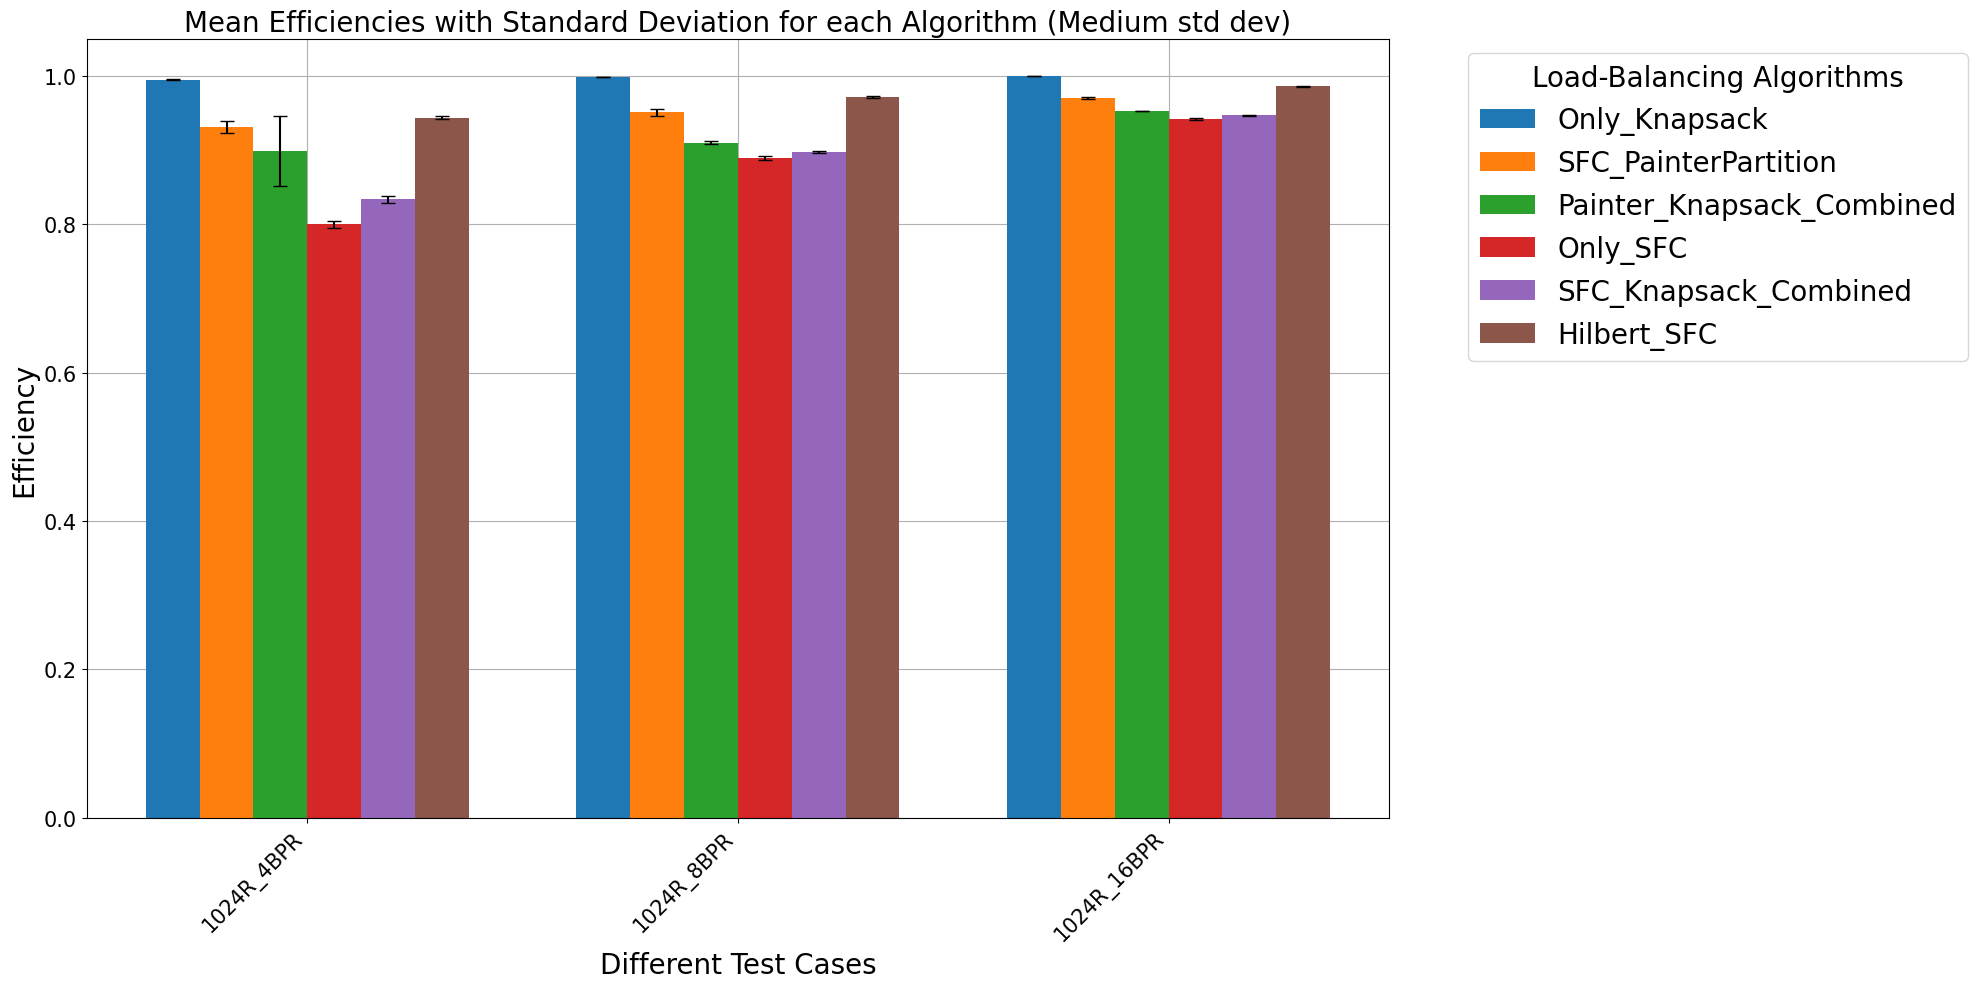

In [26]:
algorithms = ['Only_Knapsack', 'SFC_PainterPartition', 'Painter_Knapsack_Combined', 'Only_SFC', 'SFC_Knapsack_Combined', 'Hilbert_SFC']
fig, ax = plt.subplots(figsize=(20, 10))
width = 1  
num_algorithms = len(algorithms)
group_gap = 2  
x_spacing = num_algorithms * width + group_gap
x = np.arange(len(grouped['File'])) * x_spacing

for i, alg in enumerate(algorithms):
    mean_col = f'{alg}_Efficiency_mean'
    std_col = f'{alg}_Efficiency_std'
    ax.bar(x + i * width, grouped[mean_col], width,
           yerr=grouped[std_col], capsize=5, label=alg)
    
ax.grid(True)
ax.set_axisbelow(True)
ax.set_xlabel('Different Test Cases', fontsize=20)
ax.set_ylabel('Efficiency', fontsize=20)
ax.set_title('Mean Efficiencies with Standard Deviation for each Algorithm (Medium std dev)', fontsize=20)
ax.set_xticks(x + width * (num_algorithms - 1) / 2)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')
ax.tick_params(axis='both', which='major', labelsize=15)
ax.legend(title='Load-Balancing Algorithms', title_fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20)

plt.margins(x=0.05)
plt.tight_layout()
# plt.savefig('../result/new_result/result_avg/efficiency_errorbarplot.png', dpi=600)
plt.show()

In [ ]:
# algorithms = [
#     ('Only_Knapsack', 'Only_Knapsack_Efficiency', 'Only_Knapsack_Final_Time'),
#     ('Only_SFC', 'Only_SFC_Efficiency', 'Only_SFC_Final_Time'),
#     ('SFC_PainterPartition', 'SFC_PainterPartition_Efficiency', 'SFC_PainterPartition_Final_Time'),
#     ('SFC_Knapsack_Combined', 'SFC_Knapsack_Combined_Efficiency', 'SFC_Knapsack_Combined_Final_Time')
# ]

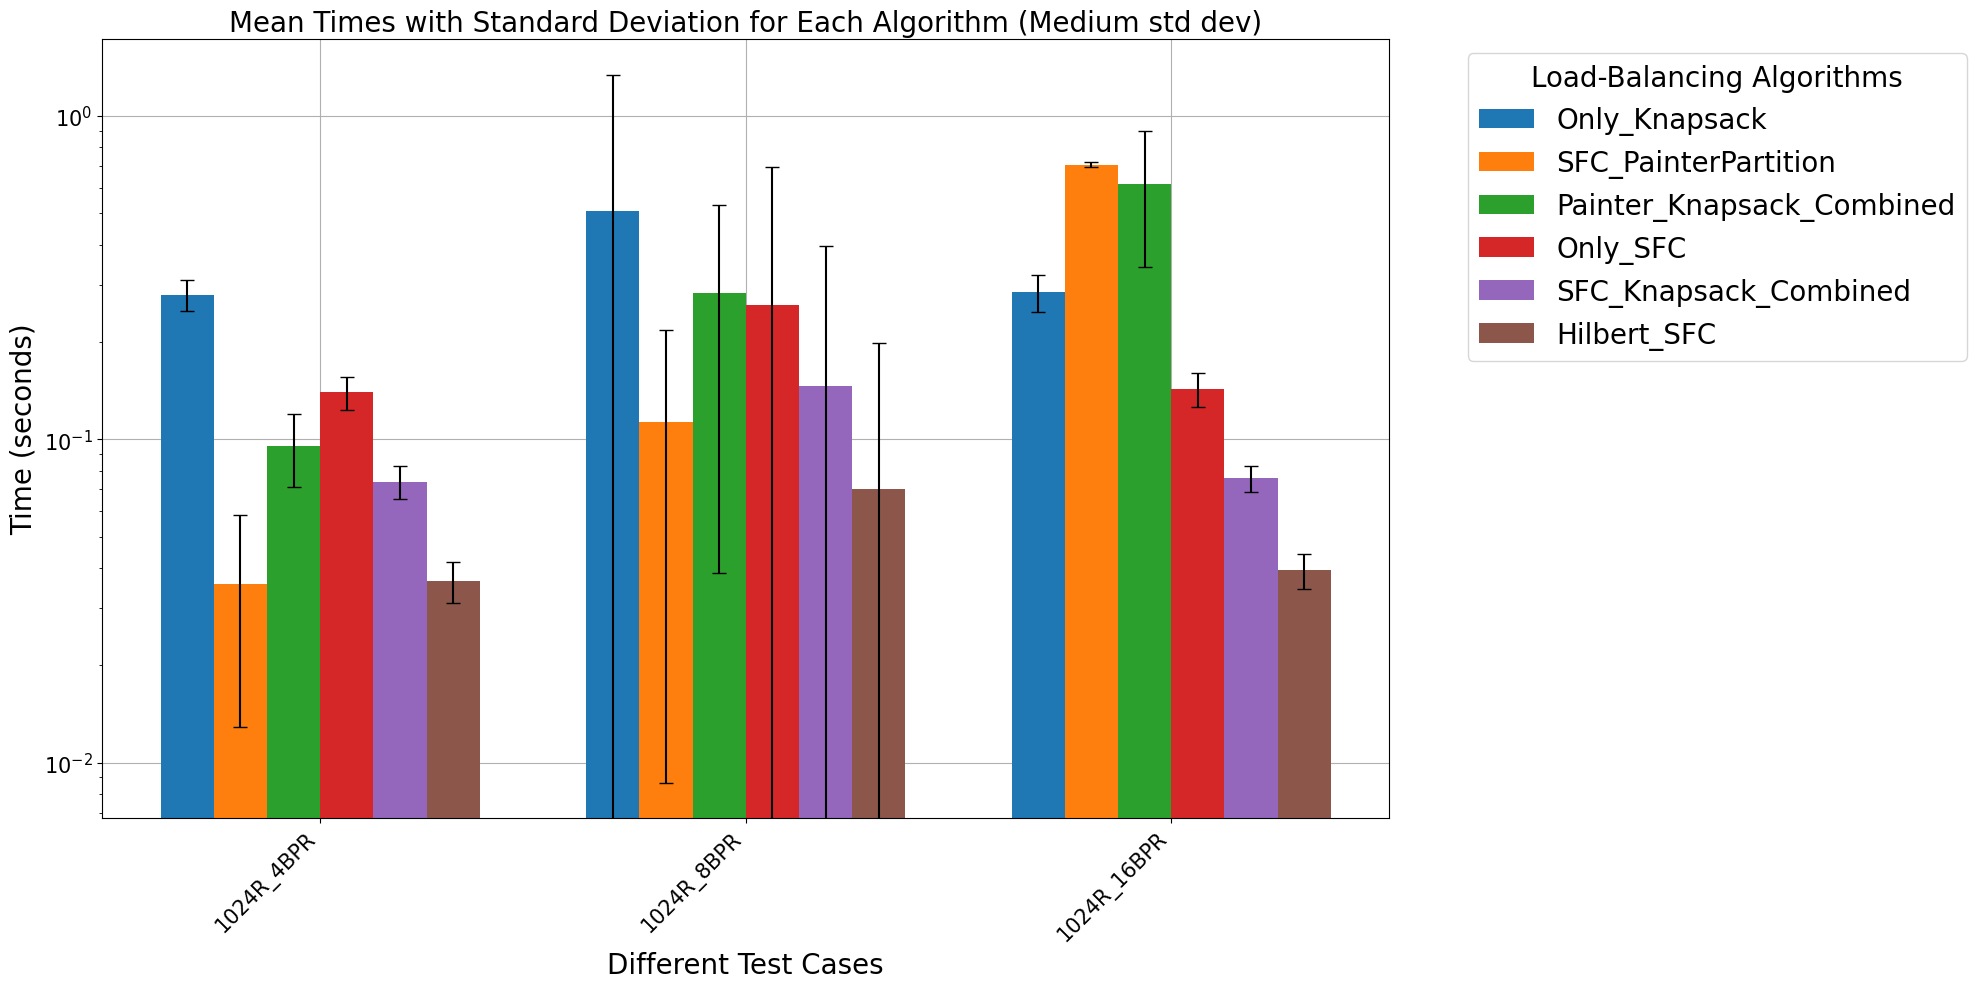

In [27]:

time = ['Only_Knapsack', 'SFC_PainterPartition', 'Painter_Knapsack_Combined', 'Only_SFC', 'SFC_Knapsack_Combined', 'Hilbert_SFC']
fig, ax = plt.subplots(figsize=(20, 10))
width = 1  
num_algorithms = len(time)
group_gap = 2  
x_spacing = num_algorithms * width + group_gap
x = np.arange(len(grouped['File'])) * x_spacing

for i, alg in enumerate(time):
    mean_col = f'{alg}_Final_Time_mean'
    std_col = f'{alg}_Final_Time_std'
    ax.bar(x + i * width, grouped[mean_col], width,
           yerr=grouped[std_col], capsize=5, label=alg)
ax.grid(True)
ax.set_axisbelow(True)
# Set y-axis to logarithmic scale
ax.set_yscale('log')

ax.set_xlabel('Different Test Cases', fontsize=20)
ax.set_ylabel('Time (seconds)', fontsize=20)
ax.set_title('Mean Times with Standard Deviation for Each Algorithm (Medium std dev)', fontsize=20)
ax.set_xticks(x + width*(len(time)-1)/2)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')
ax.tick_params(axis='both', which='major', labelsize=15)
ax.legend(title='Load-Balancing Algorithms', title_fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20)
plt.margins(x=0.05)
plt.tight_layout()
# plt.savefig('../result/new_result/result_avg/time_errorbarplot.png', dpi=600)
plt.show()

In [ ]:
algorithms = ['Only_Knapsack', 'SFC_PainterPartition', 'Painter_Knapsack_Combined', 'Only_SFC', 'SFC_Knapsack_Combined', 'Hilbert_SFC']

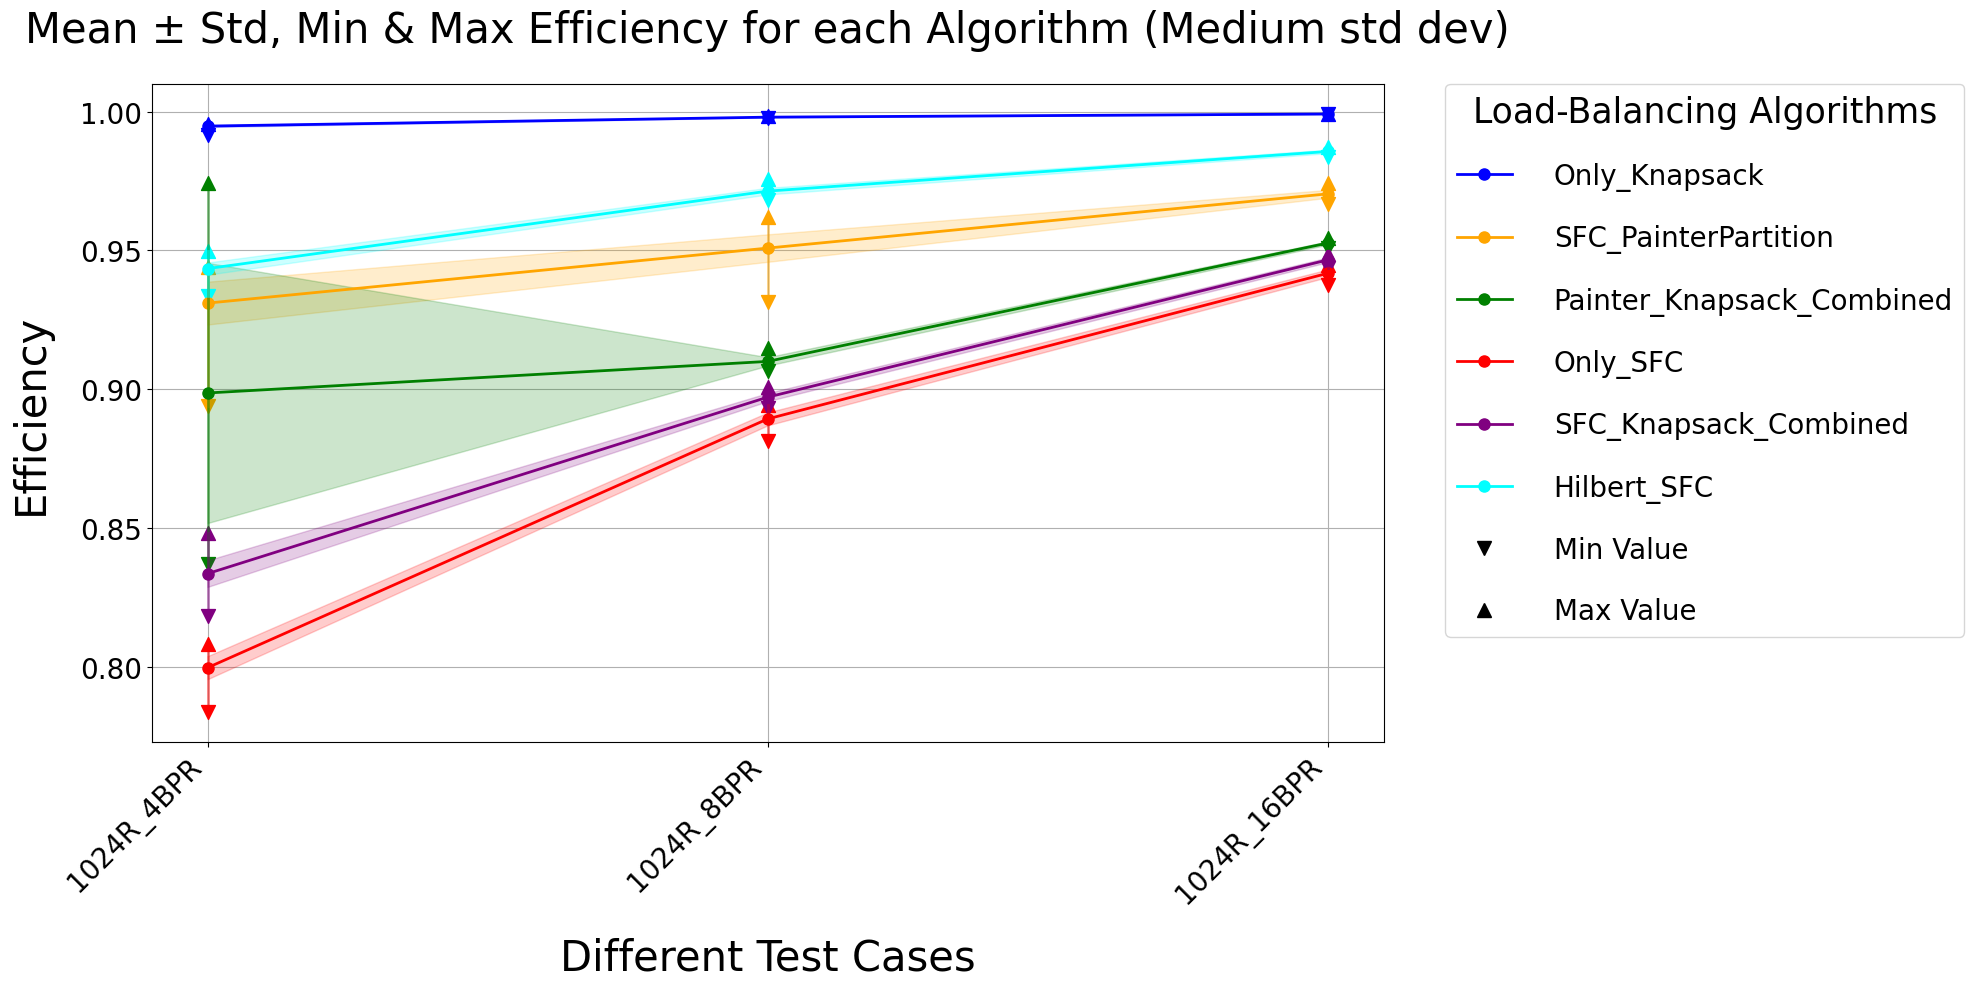

In [28]:

algorithms = ['Only_Knapsack', 'SFC_PainterPartition', 'Painter_Knapsack_Combined', 'Only_SFC', 'SFC_Knapsack_Combined', 'Hilbert_SFC']
colors = ['blue', 'orange', 'green', 'red', 'purple', 'cyan']

fig, ax = plt.subplots(figsize=(20, 10))

for i, alg in enumerate(algorithms):
    alg_name = alg  


    mean_col = f'{alg_name}_Efficiency_mean'
    std_col = f'{alg_name}_Efficiency_std'
    min_col = f'{alg_name}_Efficiency_min'
    max_col = f'{alg_name}_Efficiency_max'

    alg_color = colors[i]
    ax.plot(x, grouped[mean_col], marker='o', color=alg_color, label=alg_name, linewidth=2, markersize=8)
    ax.fill_between(
        x,
        grouped[mean_col] - grouped[std_col],
        grouped[mean_col] + grouped[std_col],
        color=alg_color,
        alpha=0.2
    )
    for j, file_name in enumerate(grouped['File']):
        min_val = grouped[min_col].iloc[j]
        max_val = grouped[max_col].iloc[j]
        ax.plot([x[j], x[j]], [min_val, max_val], color=alg_color, alpha=0.5, linewidth=2)
        ax.scatter(x[j], min_val, color=alg_color, marker='v', s=100)
        ax.scatter(x[j], max_val, color=alg_color, marker='^', s=100)

ax.set_xticks(x)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')
ax.set_xlabel('Different Test Cases',  fontsize=30, labelpad=20)
ax.set_ylabel('Efficiency', fontsize=30,labelpad=20)
ax.set_title('Mean ± Std, Min & Max Efficiency for each Algorithm (Medium std dev)', pad=30, fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)

import matplotlib.lines as mlines
min_marker = mlines.Line2D([], [], color='black', marker='v', linestyle='None', markersize=10, label='Min Value')
max_marker = mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=10, label='Max Value')

handles, labels = ax.get_legend_handles_labels()
handles += [min_marker, max_marker]
labels += ['Min Value', 'Max Value']

ax.legend(handles, labels, title='Load-Balancing Algorithms', title_fontsize=25, fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,labelspacing=1.2, handletextpad=1.5)
ax.grid(True)
ax.set_axisbelow(True)
plt.tight_layout()
# plt.savefig('../result/new_result/result_avg/efficiency_all_stats.png', dpi=600)
plt.show()





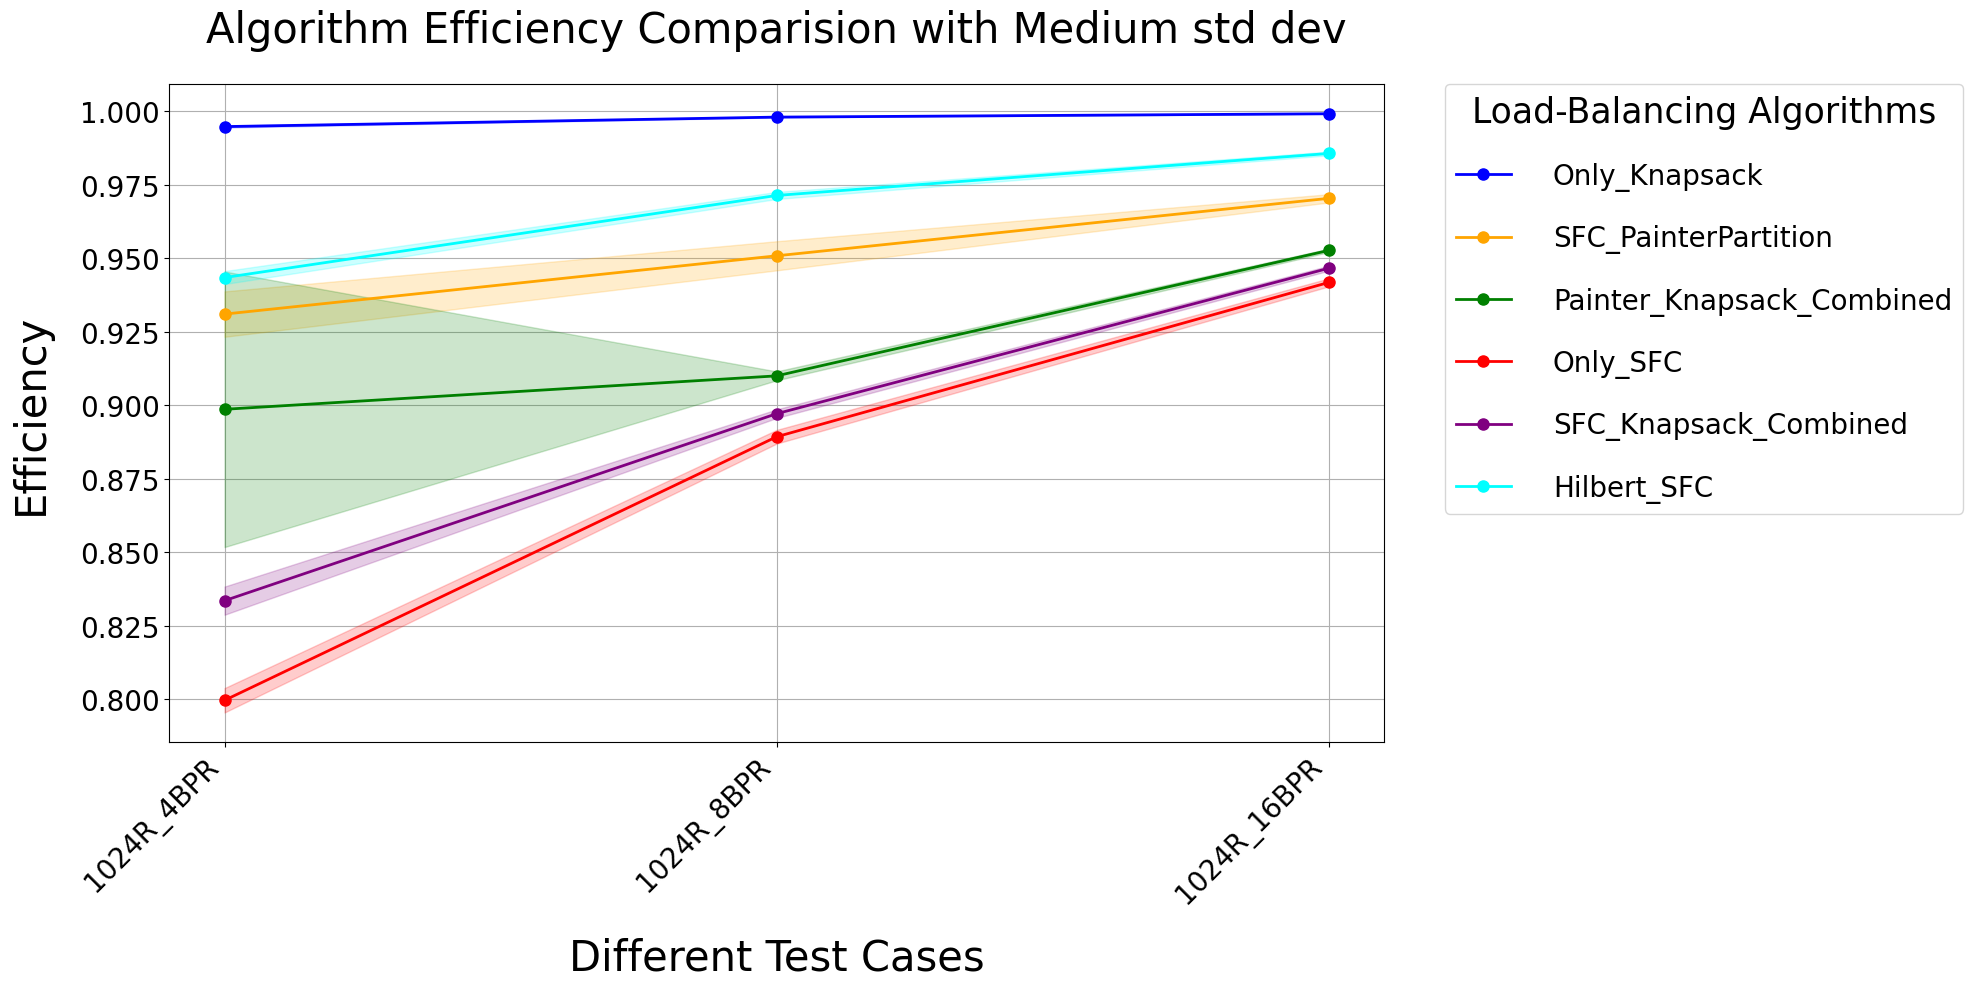

In [30]:
algorithms = [
    'Only_Knapsack', 
    'SFC_PainterPartition', 
    'Painter_Knapsack_Combined', 
    'Only_SFC', 
    'SFC_Knapsack_Combined',
    'Hilbert_SFC'
]
colors = ['blue', 'orange', 'green', 'red', 'purple', 'cyan']

fig, ax = plt.subplots(figsize=(20, 10))

for i, alg in enumerate(algorithms):
    alg_name = alg  
    
    mean_col = f'{alg_name}_Efficiency_mean'
    std_col  = f'{alg_name}_Efficiency_std'

    alg_color = colors[i]

    ax.plot(
        x, 
        grouped[mean_col], 
        marker='o', 
        color=alg_color, 
        label=alg_name, 
        linewidth=2, 
        markersize=8
    )

    ax.fill_between(
        x,
        grouped[mean_col] - grouped[std_col],
        grouped[mean_col] + grouped[std_col],
        color=alg_color,
        alpha=0.2
    )
ax.set_xticks(x)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')

ax.set_xlabel('Different Test Cases', fontsize=30, labelpad=20)
ax.set_ylabel('Efficiency', fontsize=30, labelpad=20)
ax.set_title('Algorithm Efficiency Comparision with Medium std dev',
             pad=30, fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)

ax.legend(
    title='Load-Balancing Algorithms', 
    title_fontsize=25, 
    fontsize=20,
    bbox_to_anchor=(1.05, 1), 
    loc='upper left', 
    borderaxespad=0.,
    labelspacing=1.2, 
    handletextpad=1.5
)

ax.grid(True)
ax.set_axisbelow(True)

plt.tight_layout()
plt.savefig('../result/result_avg/efficiency_all_stats_nominmax.png', dpi=600)
plt.show()

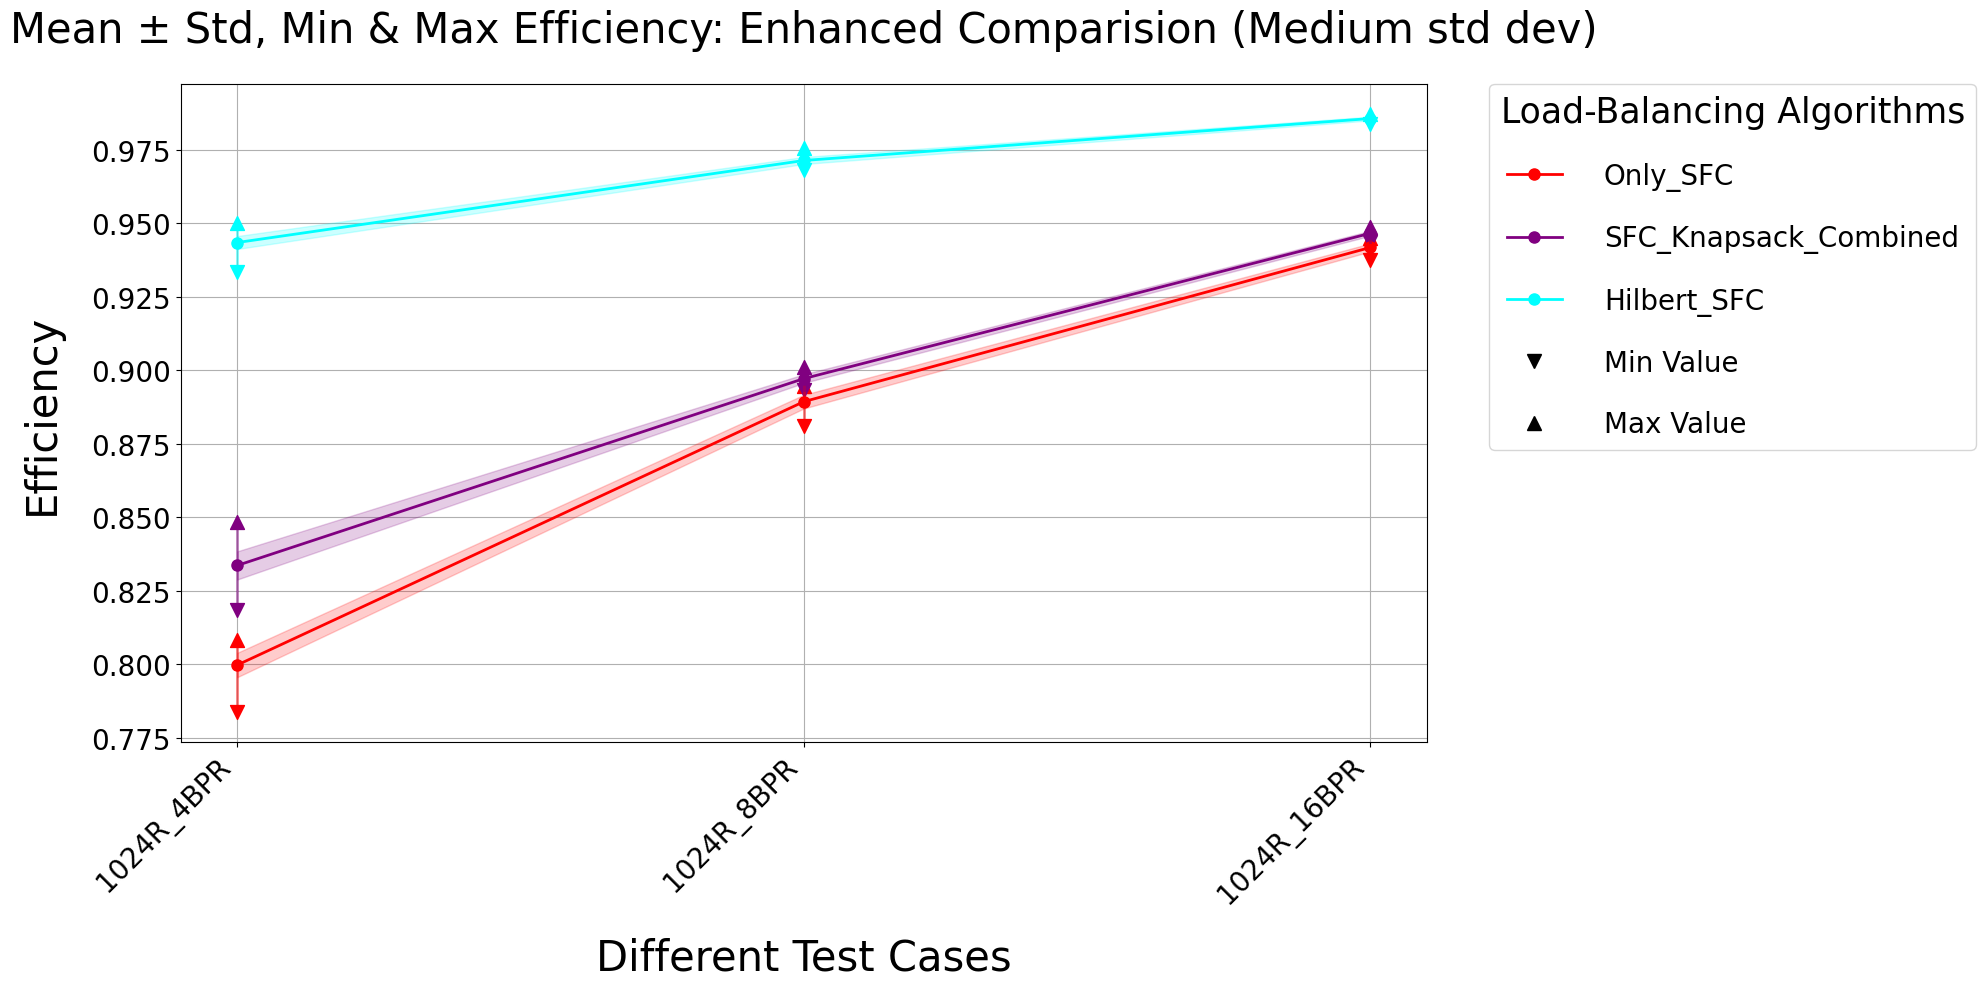

In [31]:


algorithms = ['Only_SFC', 'SFC_Knapsack_Combined', 'Hilbert_SFC']
colors = ['red', 'purple', 'cyan']

fig, ax = plt.subplots(figsize=(20, 10))

for i, alg in enumerate(algorithms):
    alg_name = alg  


    mean_col = f'{alg_name}_Efficiency_mean'
    std_col = f'{alg_name}_Efficiency_std'
    min_col = f'{alg_name}_Efficiency_min'
    max_col = f'{alg_name}_Efficiency_max'

    alg_color = colors[i]
    ax.plot(x, grouped[mean_col], marker='o', color=alg_color, label=alg_name, linewidth=2, markersize=8)
    ax.fill_between(
        x,
        grouped[mean_col] - grouped[std_col],
        grouped[mean_col] + grouped[std_col],
        color=alg_color,
        alpha=0.2
    )
    for j, file_name in enumerate(grouped['File']):
        min_val = grouped[min_col].iloc[j]
        max_val = grouped[max_col].iloc[j]
        ax.plot([x[j], x[j]], [min_val, max_val], color=alg_color, alpha=0.5, linewidth=2)
        ax.scatter(x[j], min_val, color=alg_color, marker='v', s=100)
        ax.scatter(x[j], max_val, color=alg_color, marker='^', s=100)

ax.set_xticks(x)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')
ax.set_xlabel('Different Test Cases',  fontsize=30, labelpad=20)
ax.set_ylabel('Efficiency', fontsize=30,labelpad=20)
ax.set_title('Mean ± Std, Min & Max Efficiency: Enhanced Comparision (Medium std dev)', pad=30, fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)

import matplotlib.lines as mlines
min_marker = mlines.Line2D([], [], color='black', marker='v', linestyle='None', markersize=10, label='Min Value')
max_marker = mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=10, label='Max Value')

handles, labels = ax.get_legend_handles_labels()
handles += [min_marker, max_marker]
labels += ['Min Value', 'Max Value']

ax.legend(handles, labels, title='Load-Balancing Algorithms', title_fontsize=25, fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,labelspacing=1.2, handletextpad=1.5)
ax.grid(True)
ax.set_axisbelow(True)
plt.tight_layout()
# plt.savefig('../result/new_result/result_avg/efficiency_all_stats_2.png', dpi=600)
plt.show()



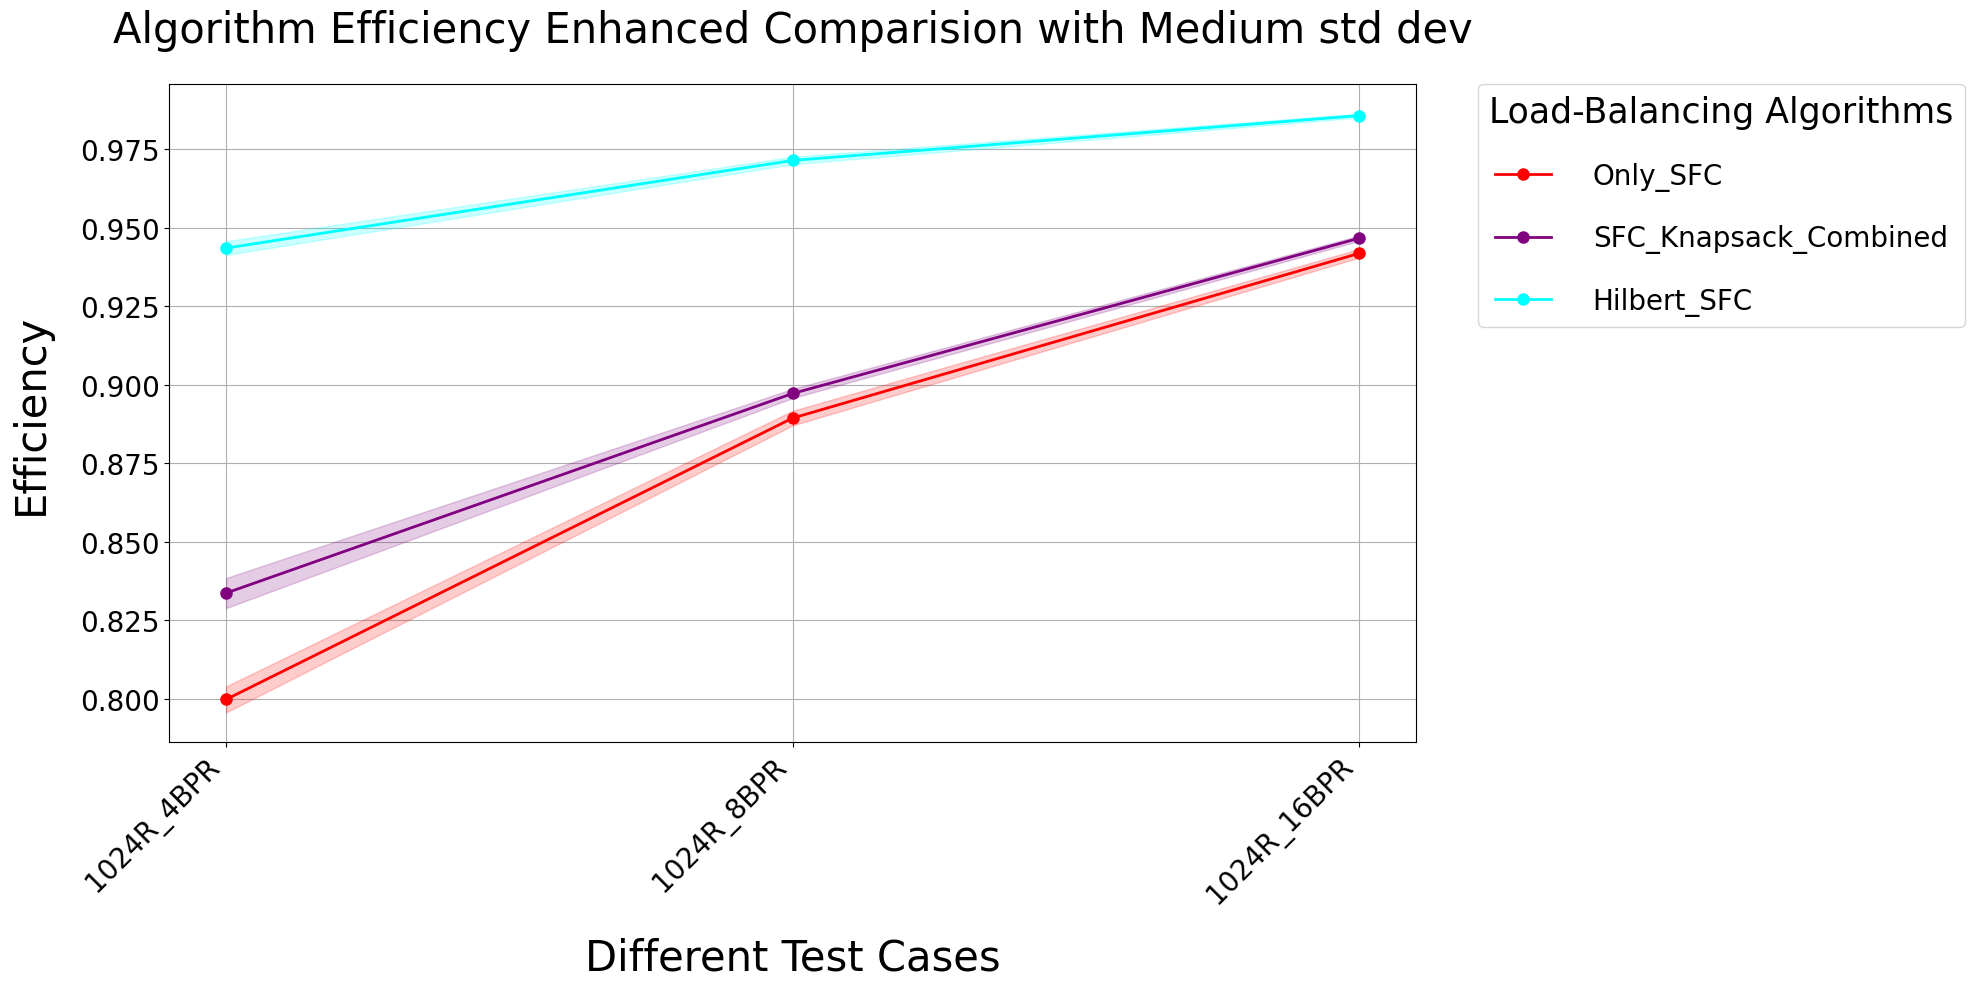

In [33]:
algorithms = ['Only_SFC', 'SFC_Knapsack_Combined', 'Hilbert_SFC']
colors = ['red', 'purple', 'cyan']

fig, ax = plt.subplots(figsize=(20, 10))

for i, alg in enumerate(algorithms):
    alg_name = alg  
    
    mean_col = f'{alg_name}_Efficiency_mean'
    std_col  = f'{alg_name}_Efficiency_std'

    alg_color = colors[i]

    ax.plot(
        x, 
        grouped[mean_col], 
        marker='o', 
        color=alg_color, 
        label=alg_name, 
        linewidth=2, 
        markersize=8
    )

    ax.fill_between(
        x,
        grouped[mean_col] - grouped[std_col],
        grouped[mean_col] + grouped[std_col],
        color=alg_color,
        alpha=0.2
    )
ax.set_xticks(x)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')

ax.set_xlabel('Different Test Cases', fontsize=30, labelpad=20)
ax.set_ylabel('Efficiency', fontsize=30, labelpad=20)
ax.set_title('Algorithm Efficiency Enhanced Comparision with Medium std dev',
             pad=30, fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)

ax.legend(
    title='Load-Balancing Algorithms', 
    title_fontsize=25, 
    fontsize=20,
    bbox_to_anchor=(1.05, 1), 
    loc='upper left', 
    borderaxespad=0.,
    labelspacing=1.2, 
    handletextpad=1.5
)

ax.grid(True)
ax.set_axisbelow(True)

plt.tight_layout()
plt.savefig('../result/result_avg/efficiency_all_stats_2_nominmax.png', dpi=600)
plt.show()

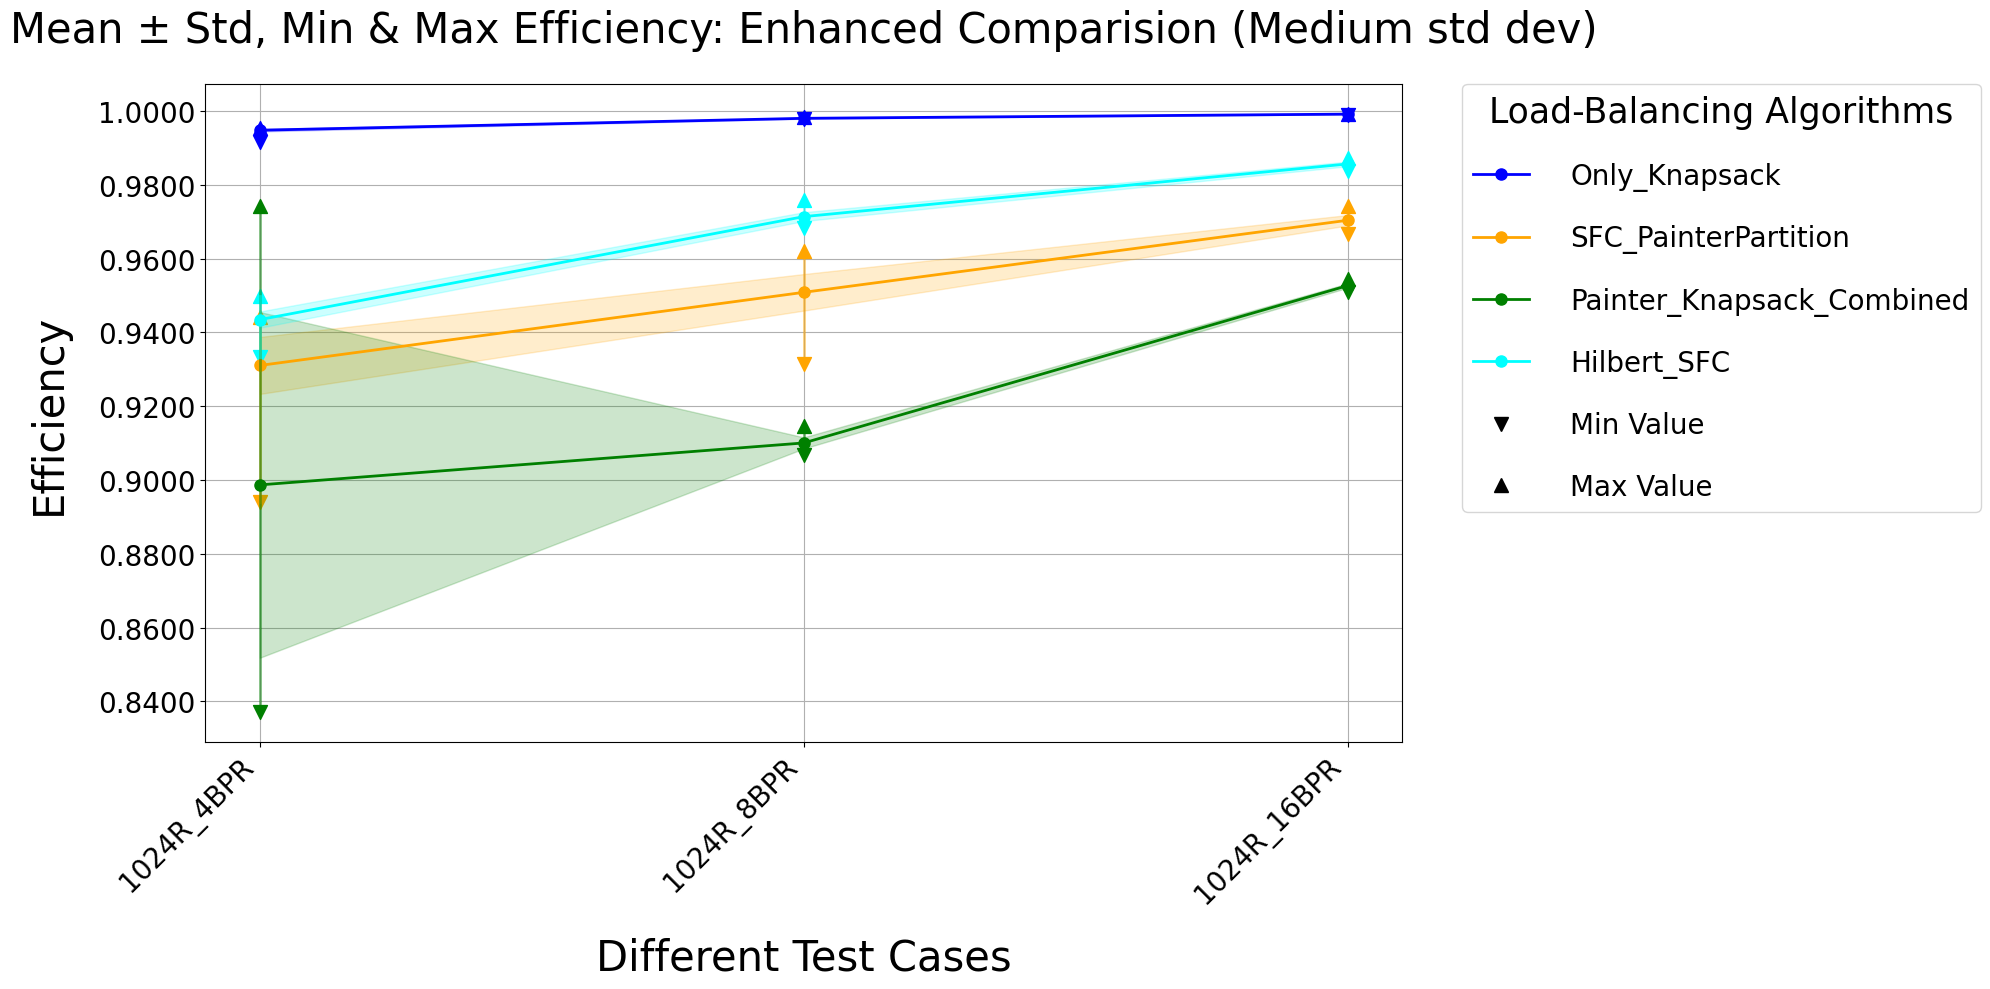

In [34]:
# algorithms = ['Only_Knapsack', 'SFC_PainterPartition', 'Painter_Knapsack_Combined', 'Only_SFC', 'SFC_Knapsack_Combined']
# colors = ['blue', 'orange', 'green', 'red', 'purple']


algorithms = ['Only_Knapsack', 'SFC_PainterPartition','Painter_Knapsack_Combined', 'Hilbert_SFC']
colors = ['blue','orange', 'green', 'cyan']

fig, ax = plt.subplots(figsize=(20, 10))

for i, alg in enumerate(algorithms):
    alg_name = alg  

    mean_col = f'{alg_name}_Efficiency_mean'
    std_col = f'{alg_name}_Efficiency_std'
    min_col = f'{alg_name}_Efficiency_min'
    max_col = f'{alg_name}_Efficiency_max'

    alg_color = colors[i]
    ax.plot(x, grouped[mean_col], marker='o', color=alg_color, label=alg_name, linewidth=2, markersize=8)
    ax.fill_between(
        x,
        grouped[mean_col] - grouped[std_col],
        grouped[mean_col] + grouped[std_col],
        color=alg_color,
        alpha=0.2
    )
    for j, file_name in enumerate(grouped['File']):
        min_val = grouped[min_col].iloc[j]
        max_val = grouped[max_col].iloc[j]
        ax.plot([x[j], x[j]], [min_val, max_val], color=alg_color, alpha=0.5, linewidth=2)
        ax.scatter(x[j], min_val, color=alg_color, marker='v', s=100)
        ax.scatter(x[j], max_val, color=alg_color, marker='^', s=100)

ax.set_xticks(x)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')
ax.set_xlabel('Different Test Cases', fontsize=30, labelpad=20)
ax.set_ylabel('Efficiency', fontsize=30, labelpad=20)
ax.set_title('Mean ± Std, Min & Max Efficiency: Enhanced Comparision (Medium std dev)', pad=30, fontsize=30)
# ax.set_ylim(0.990, 1.0005)

ax.tick_params(axis='both', which='major', labelsize=20)

ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.4f'))
min_marker = mlines.Line2D([], [], color='black', marker='v', linestyle='None', markersize=10, label='Min Value')
max_marker = mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=10, label='Max Value')
handles, labels = ax.get_legend_handles_labels()
handles += [min_marker, max_marker]
labels += ['Min Value', 'Max Value']

ax.legend(handles, labels, title='Load-Balancing Algorithms', title_fontsize=25, fontsize=20,
          bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., labelspacing=1.2, handletextpad=1.5)
ax.grid(True)
ax.set_axisbelow(True)

plt.tight_layout()
# plt.savefig('../result/new_result/result_avg/efficiency_all_stats_3.png', dpi=600)
plt.show()


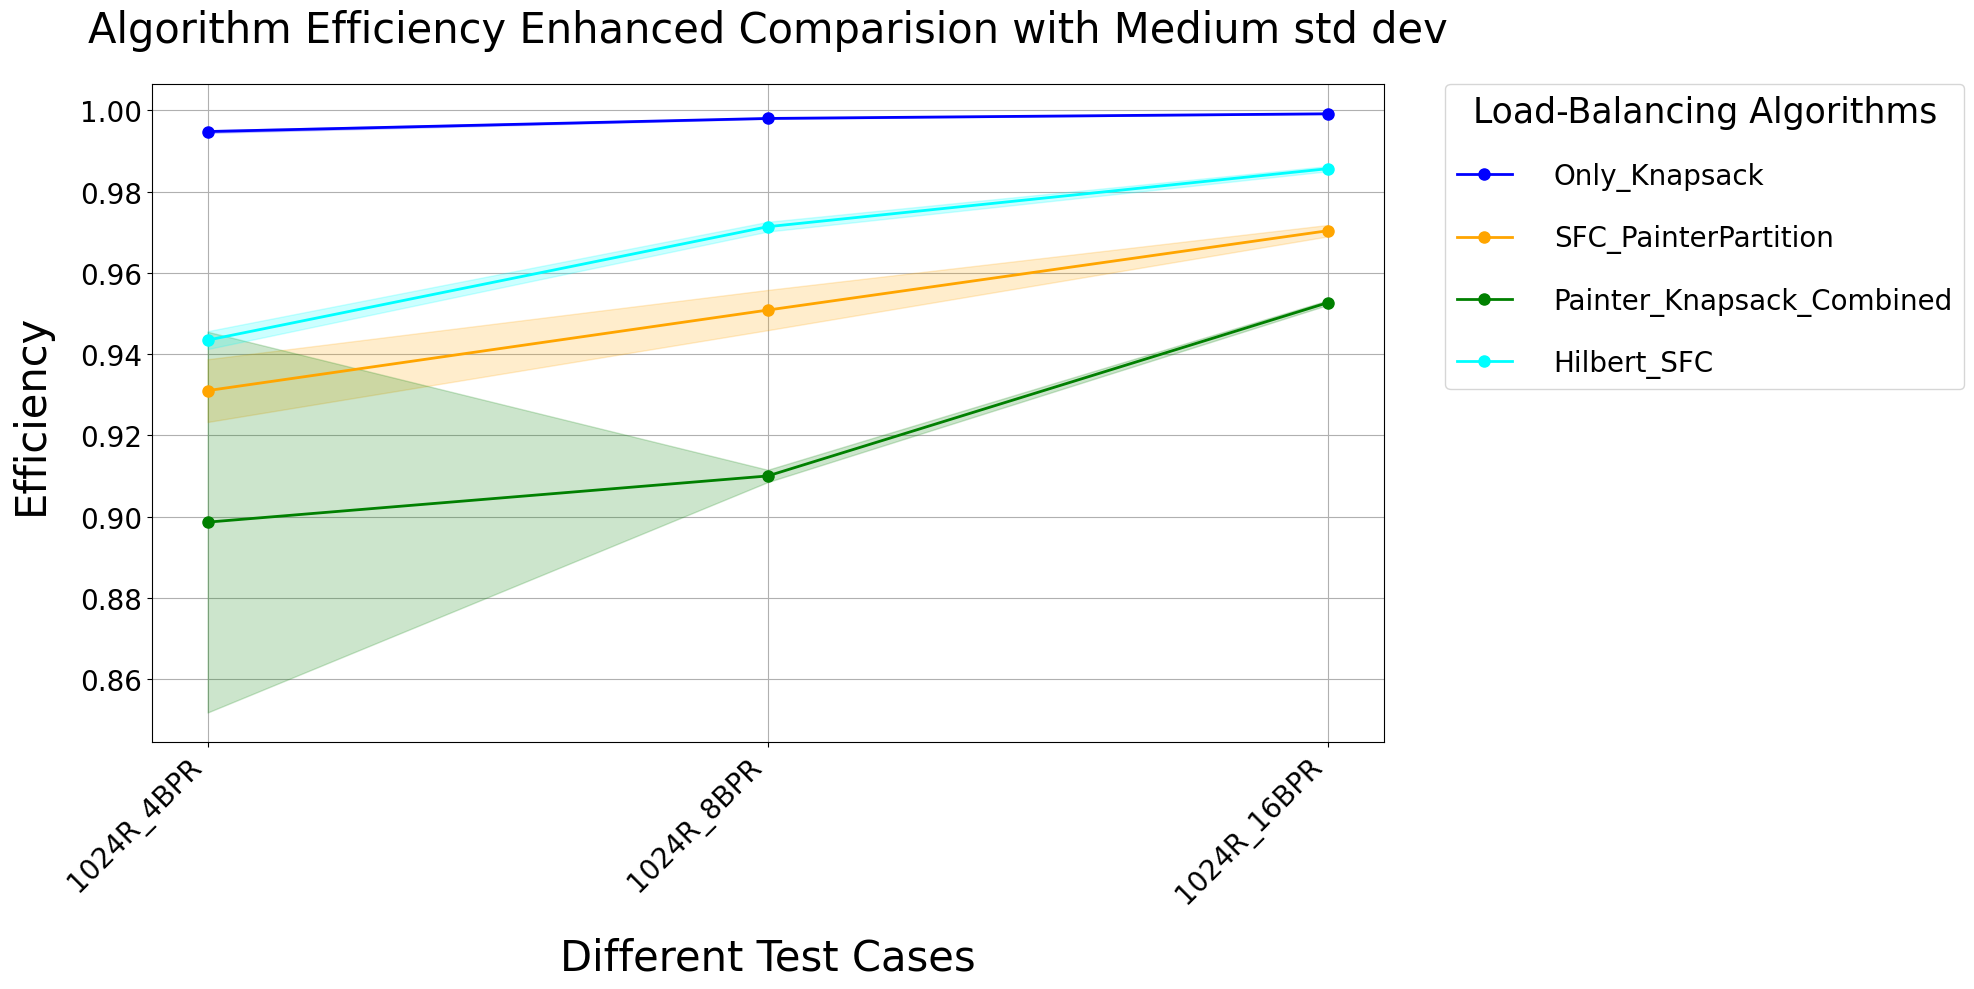

In [35]:
algorithms = ['Only_Knapsack', 'SFC_PainterPartition','Painter_Knapsack_Combined', 'Hilbert_SFC']
colors = ['blue','orange', 'green', 'cyan']

fig, ax = plt.subplots(figsize=(20, 10))

for i, alg in enumerate(algorithms):
    alg_name = alg  
    
    mean_col = f'{alg_name}_Efficiency_mean'
    std_col  = f'{alg_name}_Efficiency_std'

    alg_color = colors[i]

    ax.plot(
        x, 
        grouped[mean_col], 
        marker='o', 
        color=alg_color, 
        label=alg_name, 
        linewidth=2, 
        markersize=8
    )

    ax.fill_between(
        x,
        grouped[mean_col] - grouped[std_col],
        grouped[mean_col] + grouped[std_col],
        color=alg_color,
        alpha=0.2
    )
ax.set_xticks(x)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')

ax.set_xlabel('Different Test Cases', fontsize=30, labelpad=20)
ax.set_ylabel('Efficiency', fontsize=30, labelpad=20)
ax.set_title('Algorithm Efficiency Enhanced Comparision with Medium std dev',
             pad=30, fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)

ax.legend(
    title='Load-Balancing Algorithms', 
    title_fontsize=25, 
    fontsize=20,
    bbox_to_anchor=(1.05, 1), 
    loc='upper left', 
    borderaxespad=0.,
    labelspacing=1.2, 
    handletextpad=1.5
)

ax.grid(True)
ax.set_axisbelow(True)

plt.tight_layout()
plt.savefig('../result/result_avg/efficiency_all_stats_3_nominmax.png', dpi=600)
plt.show()

In [36]:
grouped

,File,Only_Knapsack_Efficiency_mean,Only_Knapsack_Efficiency_std,Only_Knapsack_Efficiency_min,Only_Knapsack_Efficiency_max,SFC_PainterPartition_Efficiency_mean,SFC_PainterPartition_Efficiency_std,SFC_PainterPartition_Efficiency_min,SFC_PainterPartition_Efficiency_max,Painter_Knapsack_Combined_Efficiency_mean,Painter_Knapsack_Combined_Efficiency_std,Painter_Knapsack_Combined_Efficiency_min,Painter_Knapsack_Combined_Efficiency_max,Only_SFC_Efficiency_mean,Only_SFC_Efficiency_std,Only_SFC_Efficiency_min,Only_SFC_Efficiency_max,SFC_Knapsack_Combined_Efficiency_mean,SFC_Knapsack_Combined_Efficiency_std,SFC_Knapsack_Combined_Efficiency_min,SFC_Knapsack_Combined_Efficiency_max,Hilbert_SFC_Efficiency_mean,Hilbert_SFC_Efficiency_std,Hilbert_SFC_Efficiency_min,Hilbert_SFC_Efficiency_max,Only_Knapsack_Final_Time_mean,Only_Knapsack_Final_Time_std,Only_Knapsack_Final_Time_min,Only_Knapsack_Final_Time_max,SFC_PainterPartition_Final_Time_mean,SFC_PainterPartition_Final_Time_std,SFC_PainterPartition_Final_Time_min,SFC_PainterPartition_Final_Time_max,Painter_Knapsack_Combined_Final_Time_mean,Painter_Knapsack_Combined_Final_Time_std,Painter_Knapsack_Combined_Final_Time_min,Painter_Knapsack_Combined_Final_Time_max,Only_SFC_Final_Time_mean,Only_SFC_Final_Time_std,Only_SFC_Final_Time_min,Only_SFC_Final_Time_max,SFC_Knapsack_Combined_Final_Time_mean,SFC_Knapsack_Combined_Final_Time_std,SFC_Knapsack_Combined_Final_Time_min,SFC_Knapsack_Combined_Final_Time_max,Hilbert_SFC_Final_Time_mean,Hilbert_SFC_Final_Time_std,Hilbert_SFC_Final_Time_min,Hilbert_SFC_Final_Time_max
0,1024R_4BPR,0.994793,0.000323,0.991543,0.995497,0.931035,0.007719,0.894089,0.944164,0.898664,0.046848,0.836971,0.974332,0.799714,0.004148,0.783566,0.808253,0.833593,0.004789,0.818422,0.848336,0.943462,0.002200,0.933430,0.949979,0.279747,0.030973,0.247469,0.553866,0.035606,0.022765,0.003916,0.058362,0.095451,0.024040,0.066364,0.171105,0.139709,0.016414,0.122746,0.325129,0.073956,0.008477,0.063065,0.126808,0.036427,0.005227,0.031898,0.074268
1,1024R_8BPR,0.998018,0.000106,0.997751,0.998342,0.950856,0.004954,0.931482,0.962053,0.910031,0.001516,0.906756,0.914728,0.889323,0.002327,0.881191,0.894485,0.897163,0.001466,0.893392,0.900955,0.971376,0.001203,0.968219,0.975751,0.509981,0.832179,0.258359,5.453670,0.113134,0.104462,0.014839,0.262345,0.283927,0.245283,0.081719,1.706507,0.260369,0.436978,0.130062,2.768981,0.146598,0.248536,0.068223,1.640726,0.070015,0.128568,0.034878,0.942406
2,1024R_16BPR,0.999159,0.000049,0.998976,0.999296,0.970389,0.001409,0.966576,0.974134,0.952683,0.000575,0.950971,0.954392,0.941791,0.001365,0.937547,0.944864,0.946615,0.000840,0.943527,0.948686,0.985653,0.000637,0.983839,0.987326,0.285487,0.037602,0.249800,0.540759,0.707855,0.014703,0.688697,0.738162,0.618369,0.277555,0.116856,0.852220,0.142985,0.017399,0.124720,0.227834,0.075719,0.007224,0.068090,0.109123,0.039284,0.004773,0.035697,0.083272


In [35]:

# time = ['Only_Knapsack', 'SFC_PainterPartition', 'Painter_Knapsack_Combined', 'Only_SFC', 'SFC_Knapsack_Combined']
# colors = ['blue', 'orange', 'green', 'red', 'purple']

# fig, ax = plt.subplots(figsize=(20, 10))

# for i, alg in enumerate(time):
#     alg_name = alg  

#     mean_col = f'{alg_name}_Final_Time_mean'
#     std_col = f'{alg_name}_Final_Time_std'
#     min_col = f'{alg_name}_Final_Time_min'
#     max_col = f'{alg_name}_Final_Time_max'

#     alg_color = colors[i]
#     ax.plot(x, grouped[mean_col], marker='o', color=alg_color, label=alg_name, linewidth=2, markersize=8)
#     lower_bound = np.maximum(grouped[mean_col] - grouped[std_col], 1e-5) 
#     upper_bound = grouped[mean_col] + grouped[std_col]

#     ax.fill_between(
#         x,
#         lower_bound,
#         upper_bound,
#         color=alg_color,
#         alpha=0.2
#     )
#     for j, file_name in enumerate(grouped['File']):
#         min_val = grouped[min_col].iloc[j]
#         max_val = grouped[max_col].iloc[j]
#         ax.plot([x[j], x[j]], [min_val, max_val], color=alg_color, alpha=0.5, linewidth=2)
#         ax.scatter(x[j], min_val, color=alg_color, marker='v', s=100)
#         ax.scatter(x[j], max_val, color=alg_color, marker='^', s=100)

# ax.set_xticks(x)
# ax.set_xticklabels(grouped['File'], rotation=45, ha='right')
# ax.set_xlabel('Different Test Cases (R --> Ranks, BPR --> Boxes per Rank)', fontsize=30, labelpad=20)
# ax.set_ylabel('Time (seconds)', fontsize=30, labelpad=20)
# ax.set_title('Mean ± Std, Min & Max Time for each Algorithm (Low std dev)', pad=30, fontsize=30)
# ax.tick_params(axis='both', which='major', labelsize=20)
# ax.set_yscale('log')
# ax.set_ylim(1e-6, 0)  

# min_marker = mlines.Line2D([], [], color='black', marker='v', linestyle='None', markersize=10, label='Min Value')
# max_marker = mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=10, label='Max Value')

# handles, labels = ax.get_legend_handles_labels()
# handles += [min_marker, max_marker]
# labels += ['Min Value', 'Max Value']

# ax.legend(handles, labels, title='Load-Balancing Algorithms', title_fontsize=25, fontsize=20,
#           bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., labelspacing=1.2, handletextpad=1.5)
# ax.grid(True)
# ax.set_axisbelow(True)

# plt.tight_layout()
# # plt.savefig('../result/new_result/result_best/time_all_stats.png', dpi=600)
# plt.show()




In [36]:
# time = ['Only_Knapsack', 'SFC_PainterPartition', 'Painter_Knapsack_Combined', 'Only_SFC', 'SFC_Knapsack_Combined']
# colors = ['blue', 'orange', 'green', 'red', 'purple']

# fig, ax = plt.subplots(figsize=(20, 10))

# for i, alg in enumerate(time):
#     alg_name = alg  

#     mean_col = f'{alg_name}_Final_Time_mean'
#     min_col = f'{alg_name}_Final_Time_min'
#     max_col = f'{alg_name}_Final_Time_max'

#     alg_color = colors[i]

#     ax.plot(x, grouped[mean_col], marker='o', color=alg_color, label=alg_name, linewidth=2, markersize=8)
#     for j, file_name in enumerate(grouped['File']):
#         min_val = grouped[min_col].iloc[j]
#         max_val = grouped[max_col].iloc[j]

#         ax.plot([x[j], x[j]], [min_val, max_val], color=alg_color, alpha=0.5, linewidth=2)

#         ax.scatter(x[j], min_val, color=alg_color, marker='v', s=100)

#         ax.scatter(x[j], max_val, color=alg_color, marker='^', s=100)


# ax.set_xticks(x)
# ax.set_xticklabels(grouped['File'], rotation=45, ha='right')
# ax.set_xlabel('Different Test Cases (R --> Ranks, BPR --> Boxes per Rank)', fontsize=30,labelpad=20)
# ax.set_ylabel('Time (seconds)', fontsize=30,  labelpad=20)
# ax.set_title('Mean, Min & Max Time for each Algorithm (Low std dev)', pad=30, fontsize=30)
# ax.tick_params(axis='both', which='major', labelsize=20)

# ax.set_yscale('log')
# ax.set_ylim(1e-7, 0)  


# min_marker = mlines.Line2D([], [], color='black', marker='v', linestyle='None', markersize=10, label='Min Value')
# max_marker = mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=10, label='Max Value')

# handles, labels = ax.get_legend_handles_labels()
# handles += [min_marker, max_marker]
# labels += ['Min Value', 'Max Value']

# ax.legend(handles, labels, title='Load-Balancing Algorithms', title_fontsize=20, fontsize=20,
#           bbox_to_anchor=(1.05, 1), loc='upper left',  borderaxespad=0., labelspacing=1.2, handletextpad=1.5)
# ax.grid(True)
# ax.set_axisbelow(True)

# plt.tight_layout()
# # plt.savefig('../result/new_result/result_best/time_all_stats_2.png', dpi=600)
# plt.show()




In [37]:
grouped

,File,Only_Knapsack_Efficiency_mean,Only_Knapsack_Efficiency_std,Only_Knapsack_Efficiency_min,Only_Knapsack_Efficiency_max,SFC_PainterPartition_Efficiency_mean,SFC_PainterPartition_Efficiency_std,SFC_PainterPartition_Efficiency_min,SFC_PainterPartition_Efficiency_max,Painter_Knapsack_Combined_Efficiency_mean,Painter_Knapsack_Combined_Efficiency_std,Painter_Knapsack_Combined_Efficiency_min,Painter_Knapsack_Combined_Efficiency_max,Only_SFC_Efficiency_mean,Only_SFC_Efficiency_std,Only_SFC_Efficiency_min,Only_SFC_Efficiency_max,SFC_Knapsack_Combined_Efficiency_mean,SFC_Knapsack_Combined_Efficiency_std,SFC_Knapsack_Combined_Efficiency_min,SFC_Knapsack_Combined_Efficiency_max,Hilbert_SFC_Efficiency_mean,Hilbert_SFC_Efficiency_std,Hilbert_SFC_Efficiency_min,Hilbert_SFC_Efficiency_max,Only_Knapsack_Final_Time_mean,Only_Knapsack_Final_Time_std,Only_Knapsack_Final_Time_min,Only_Knapsack_Final_Time_max,SFC_PainterPartition_Final_Time_mean,SFC_PainterPartition_Final_Time_std,SFC_PainterPartition_Final_Time_min,SFC_PainterPartition_Final_Time_max,Painter_Knapsack_Combined_Final_Time_mean,Painter_Knapsack_Combined_Final_Time_std,Painter_Knapsack_Combined_Final_Time_min,Painter_Knapsack_Combined_Final_Time_max,Only_SFC_Final_Time_mean,Only_SFC_Final_Time_std,Only_SFC_Final_Time_min,Only_SFC_Final_Time_max,SFC_Knapsack_Combined_Final_Time_mean,SFC_Knapsack_Combined_Final_Time_std,SFC_Knapsack_Combined_Final_Time_min,SFC_Knapsack_Combined_Final_Time_max,Hilbert_SFC_Final_Time_mean,Hilbert_SFC_Final_Time_std,Hilbert_SFC_Final_Time_min,Hilbert_SFC_Final_Time_max
0,1024R_4BPR,0.994793,0.000323,0.991543,0.995497,0.931035,0.007719,0.894089,0.944164,0.898664,0.046848,0.836971,0.974332,0.799714,0.004148,0.783566,0.808253,0.833593,0.004789,0.818422,0.848336,0.943462,0.002200,0.933430,0.949979,0.279747,0.030973,0.247469,0.553866,0.035606,0.022765,0.003916,0.058362,0.095451,0.024040,0.066364,0.171105,0.139709,0.016414,0.122746,0.325129,0.073956,0.008477,0.063065,0.126808,0.036427,0.005227,0.031898,0.074268
1,1024R_8BPR,0.998018,0.000106,0.997751,0.998342,0.950856,0.004954,0.931482,0.962053,0.910031,0.001516,0.906756,0.914728,0.889323,0.002327,0.881191,0.894485,0.897163,0.001466,0.893392,0.900955,0.971376,0.001203,0.968219,0.975751,0.509981,0.832179,0.258359,5.453670,0.113134,0.104462,0.014839,0.262345,0.283927,0.245283,0.081719,1.706507,0.260369,0.436978,0.130062,2.768981,0.146598,0.248536,0.068223,1.640726,0.070015,0.128568,0.034878,0.942406
2,1024R_16BPR,0.999159,0.000049,0.998976,0.999296,0.970389,0.001409,0.966576,0.974134,0.952683,0.000575,0.950971,0.954392,0.941791,0.001365,0.937547,0.944864,0.946615,0.000840,0.943527,0.948686,0.985653,0.000637,0.983839,0.987326,0.285487,0.037602,0.249800,0.540759,0.707855,0.014703,0.688697,0.738162,0.618369,0.277555,0.116856,0.852220,0.142985,0.017399,0.124720,0.227834,0.075719,0.007224,0.068090,0.109123,0.039284,0.004773,0.035697,0.083272


In [38]:
columns_to_keep = ['File','Only_Knapsack_Efficiency_mean', 'Only_SFC_Efficiency_mean', 'SFC_PainterPartition_Efficiency_mean', 'Painter_Knapsack_Combined_Efficiency_mean', 'SFC_Knapsack_Combined_Efficiency_mean', 'Only_Knapsack_Final_Time_mean', 'Only_SFC_Final_Time_mean', 'SFC_PainterPartition_Final_Time_mean', 'Painter_Knapsack_Combined_Final_Time_mean', 'SFC_Knapsack_Combined_Final_Time_mean' , 'Hilbert_SFC_Final_Time_mean', 'Hilbert_SFC_Efficiency_mean']
new_df = grouped[columns_to_keep]


In [39]:
new_df

,File,Only_Knapsack_Efficiency_mean,Only_SFC_Efficiency_mean,SFC_PainterPartition_Efficiency_mean,Painter_Knapsack_Combined_Efficiency_mean,SFC_Knapsack_Combined_Efficiency_mean,Only_Knapsack_Final_Time_mean,Only_SFC_Final_Time_mean,SFC_PainterPartition_Final_Time_mean,Painter_Knapsack_Combined_Final_Time_mean,SFC_Knapsack_Combined_Final_Time_mean,Hilbert_SFC_Final_Time_mean,Hilbert_SFC_Efficiency_mean
0,1024R_4BPR,0.994793,0.799714,0.931035,0.898664,0.833593,0.279747,0.139709,0.035606,0.095451,0.073956,0.036427,0.943462
1,1024R_8BPR,0.998018,0.889323,0.950856,0.910031,0.897163,0.509981,0.260369,0.113134,0.283927,0.146598,0.070015,0.971376
2,1024R_16BPR,0.999159,0.941791,0.970389,0.952683,0.946615,0.285487,0.142985,0.707855,0.618369,0.075719,0.039284,0.985653


In [40]:
# algorithms = [
#     ('Only_Knapsack', 'Only_Knapsack_Efficiency', 'Only_Knapsack_Final_Time'),
#     ('Only_SFC', 'Only_SFC_Efficiency', 'Only_SFC_Final_Time'),
#     ('SFC_PainterPartition', 'SFC_PainterPartition_Efficiency', 'SFC_PainterPartition_Final_Time'),
#     ('SFC_Knapsack_Combined', 'SFC_Knapsack_Combined_Efficiency', 'SFC_Knapsack_Combined_Final_Time')
# ]

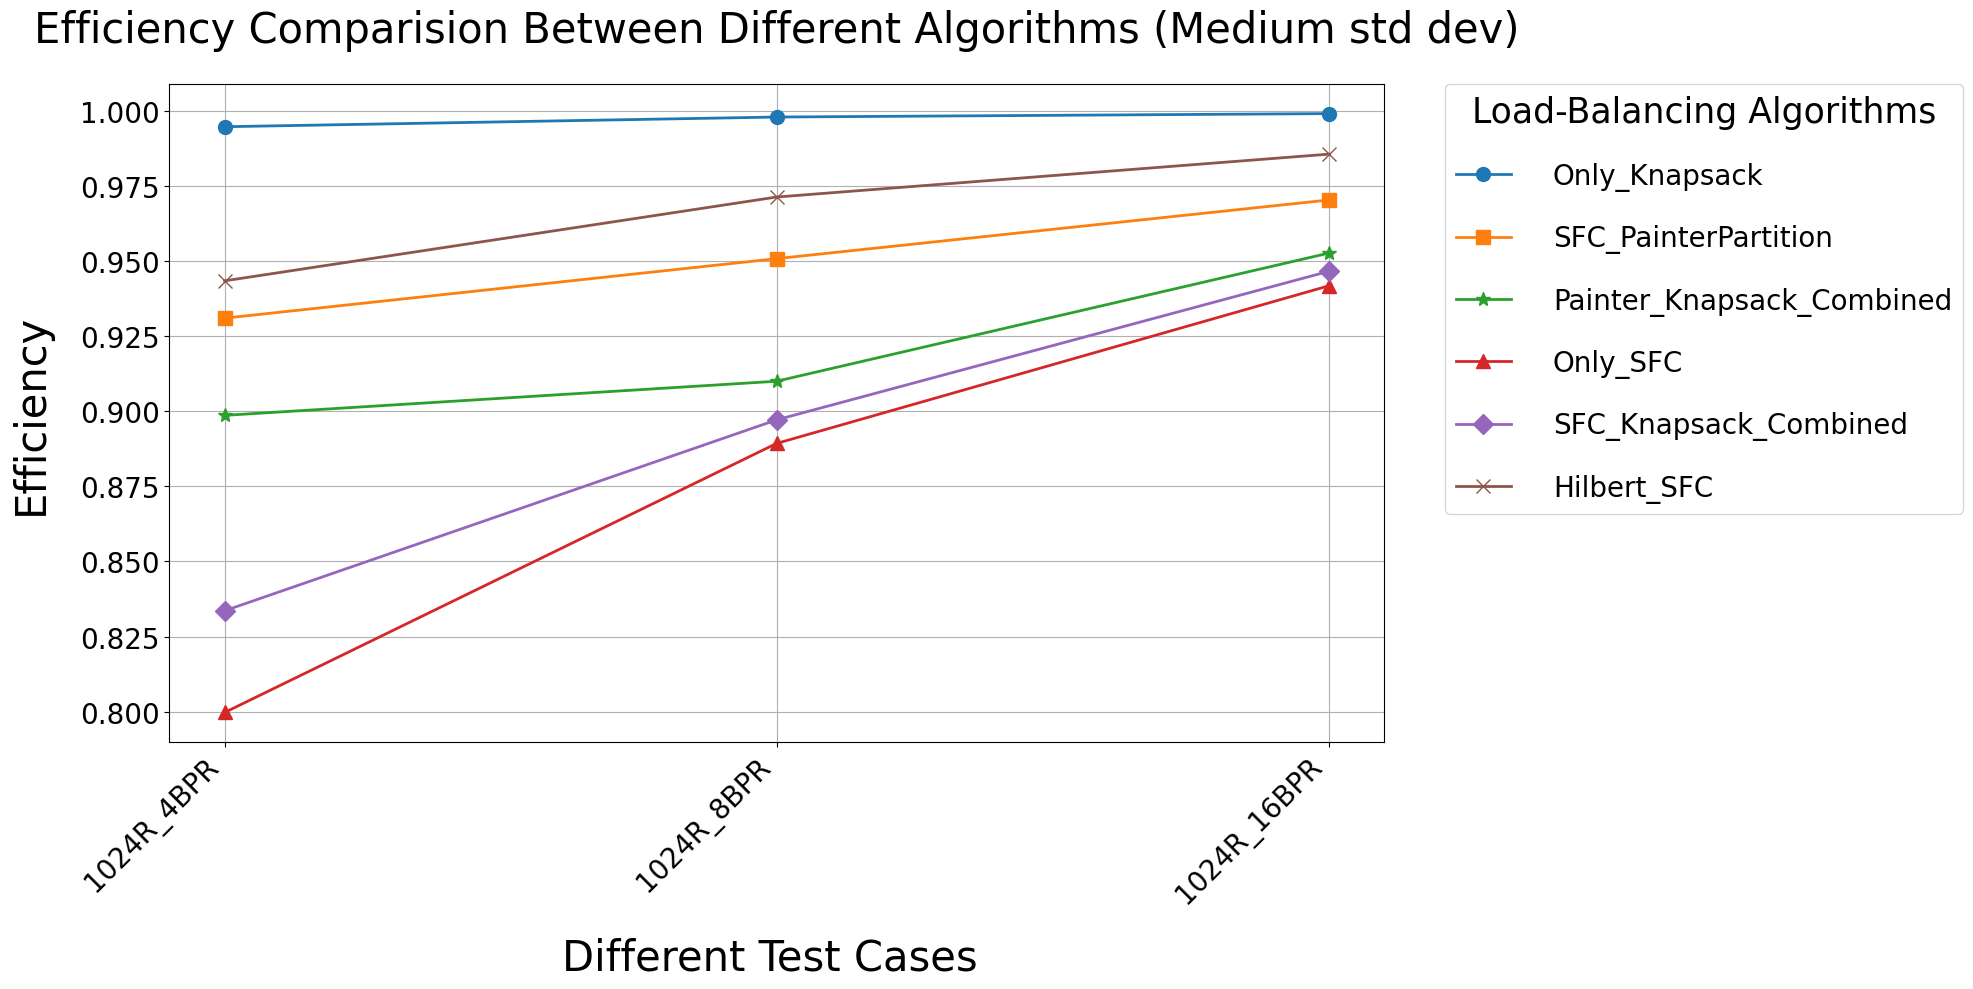

In [40]:
algorithms = [
    ('Only_Knapsack', 'Only_Knapsack_Efficiency_mean', 'Only_Knapsack_Final_Time_mean', 'o'),
    ('SFC_PainterPartition', 'SFC_PainterPartition_Efficiency_mean', 'SFC_PainterPartition_Final_Time_mean', 's'),
    ('Painter_Knapsack_Combined', 'Painter_Knapsack_Combined_Efficiency_mean', 'Painter_Knapsack_Combined_Final_Time_mean', '*'),
    ('Only_SFC', 'Only_SFC_Efficiency_mean', 'Only_SFC_Final_Time_mean', '^'),
    ('SFC_Knapsack_Combined', 'SFC_Knapsack_Combined_Efficiency_mean', 'SFC_Knapsack_Combined_Final_Time_mean', 'D'),
    ('Hilbert_SFC', 'Hilbert_SFC_Efficiency_mean', 'Hilbert_SFC_Final_Time_mean', 'x')
]

x = np.arange(len(new_df['File']))
fig, ax = plt.subplots(figsize=(20, 10))

for alg_name, eff_col, time_col, marker in algorithms:
    ax.plot(x, new_df[eff_col], marker=marker, markersize=10, linewidth=2, label=alg_name)
ax.set_xticks(x)
ax.set_xticklabels(new_df['File'], rotation=45, ha='right')
ax.set_xlabel('Different Test Cases ', fontsize=30,labelpad=20)
ax.set_ylabel('Efficiency', fontsize=30,  labelpad=20)
ax.set_title('Efficiency Comparision Between Different Algorithms (Medium std dev)', pad=30, fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)


ax.legend(title='Load-Balancing Algorithms', title_fontsize=25, fontsize=20,
          bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., labelspacing=1.2, handletextpad=1.5)

ax.grid(True)
ax.set_axisbelow(True)
plt.tight_layout()
# plt.savefig('../result/new_result/result_avg/efficiency.png', dpi=600)
plt.show()





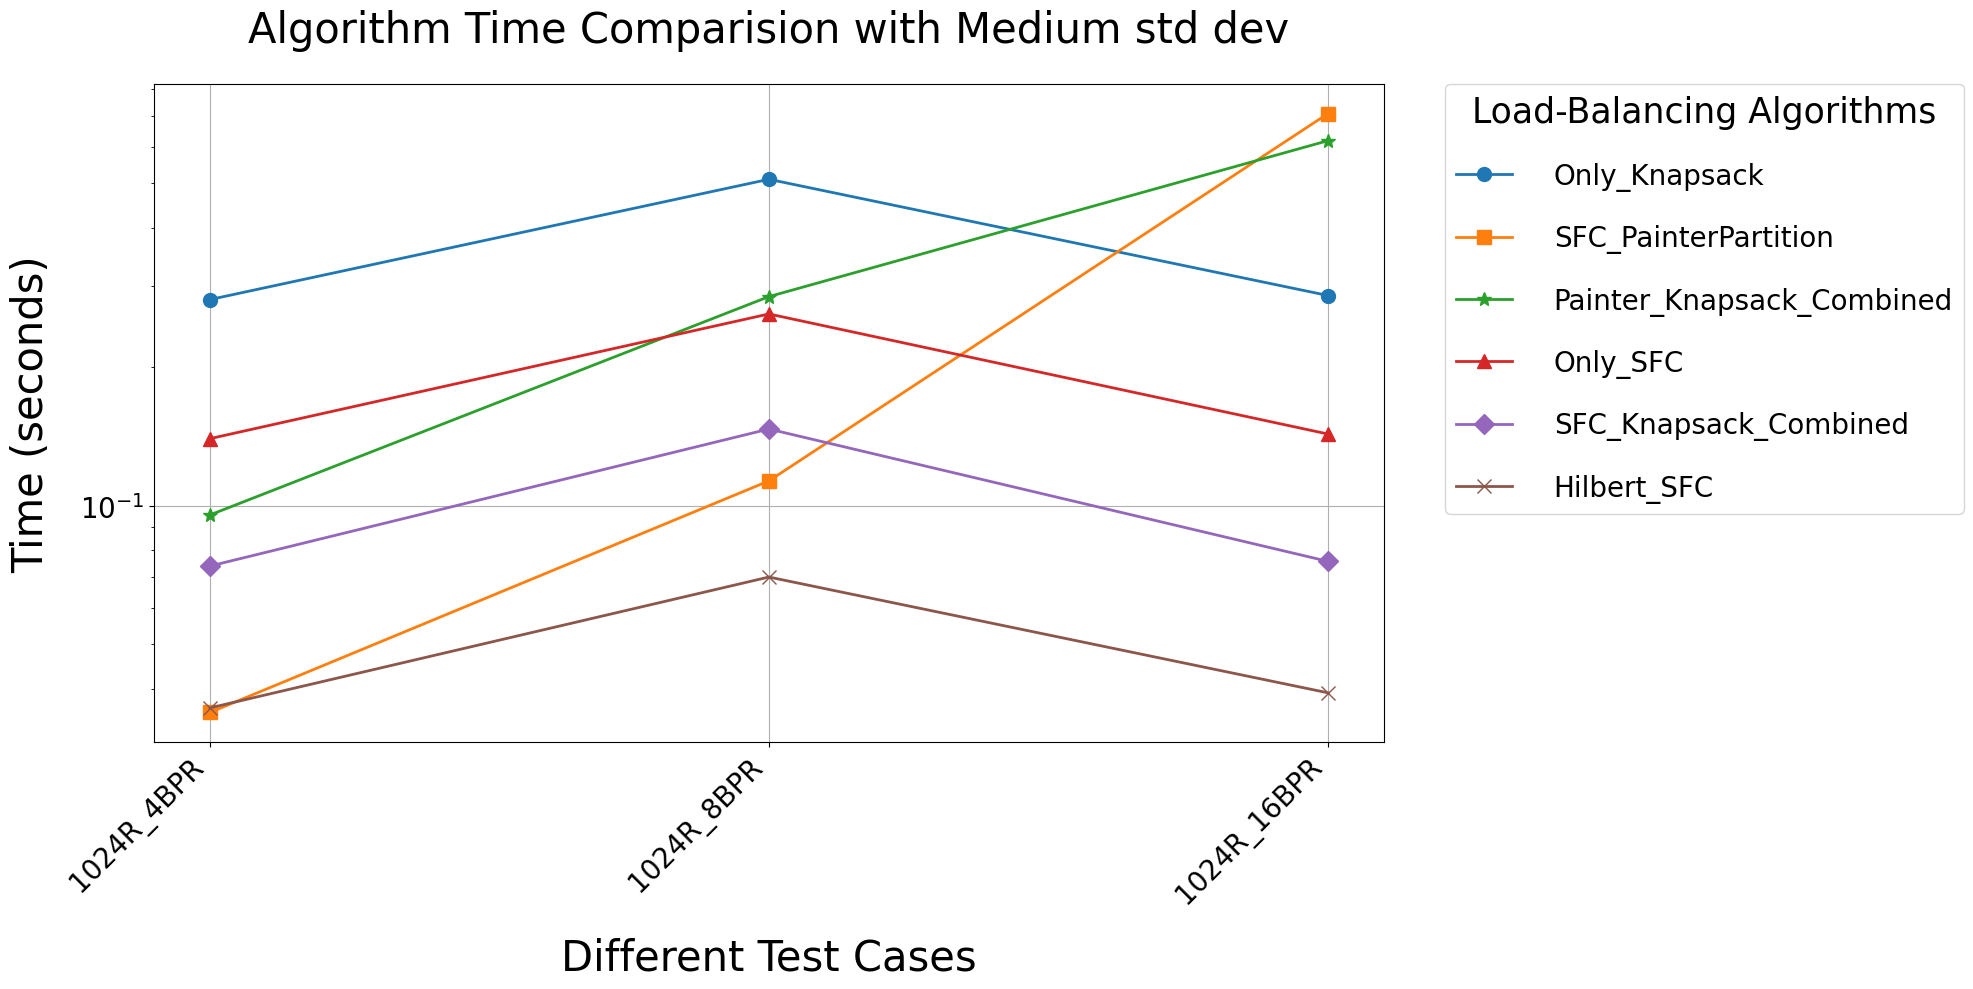

In [41]:
# fig, ax = plt.subplots(figsize=(20, 10))

# for alg_name, eff_col, time_col, marker in algorithms:
#     ax.plot(x, new_df[time_col], marker=marker, markersize=10, linewidth=2, label=alg_name)
# ax.set_xticks(x)
# ax.set_xticklabels(new_df['File'], rotation=45, ha='right')
# ax.set_xlabel('File', fontsize=15)
# ax.set_ylabel('Time (seconds)', fontsize=15)
# ax.set_title('Time Means by File and Algorithm', fontsize=20)
# ax.tick_params(axis='both', which='major', labelsize=15)
# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20)

# plt.tight_layout()
# plt.show()


x = np.arange(len(new_df['File']))
fig, ax = plt.subplots(figsize=(20, 10))

for alg_name, eff_col, time_col, marker in algorithms:
    ax.plot(x, new_df[time_col], marker=marker, markersize=10, linewidth=2, label=alg_name)
ax.set_xticks(x)
ax.set_xticklabels(new_df['File'], rotation=45, ha='right')
ax.set_xlabel('Different Test Cases', fontsize=30,labelpad=20)
ax.set_ylabel('Time (seconds)',  fontsize=30,  labelpad=20)
ax.set_title('Algorithm Time Comparision with Medium std dev', pad=30, fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)

ax.legend(title='Load-Balancing Algorithms', title_fontsize=25, fontsize=20,
          bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., labelspacing=1.2, handletextpad=1.5)
ax.grid(True)
ax.set_axisbelow(True)
ax.set_yscale('log')
plt.tight_layout()
plt.savefig('../result/result_avg/time.png', dpi=600)
plt.show()


